# MineB4USign: Mining Legal Documents/Terms and Conditions for Intent


## Content

- [Motivation](#Motivation)
- [End to End Picture: The Pipe Line](#End-to-End-Picture:-The-Pipe-Line)
- [Data collection and processing](#Data-collection-and-processing)
- [Feeling the Data](#Feeling-the-Data)
- [Preprocessing](#Preprocessing)
- [Machine Learning Algorithms](#Machine-Learning-Algorithms)
    - [SVM](#SVM)
    - [Reasons For Selecting SVM](#Reasons-For-Selecting-SVM)

- [Pittfalls and how to avoid them](#Pittfalls-and-how-to-avoid-them)
- [Installing the library](#Installing-the-library)
- [Code walkthrough](#Code-walkthrough)
- [Colorful examples](#Colorful-examples)
- [Data preparation](#Data-preparation)
- [Goal](#Goal)
- [Understanding the data](#Understanding-the-data)
- [SQL to the rescue](#SQL-to-the-rescue)
- [SQL + Plotly + Bar Graph + Python](#SQL-+-Plotly-+-Bar-Graph-+-Python)
- [Further resources](#Further-resources)
- [References and Citations](#References-and-Citations)

## Motivation

How many times have we accepted the terms and conditions while signing up for a service like the google photos etc ? Not a very prudent thing to do right ? We dont blame you. Since all of us use a vast number of such "free" services, its not practical to read through all of the conditions. It is very time consuming (As CMU students thats the last thing we have in plenty !!!). But that does not mean we should not be well informed of what we are signing up for right ?

If only there were a way to get a better understanding of such legal documents without having to read the entire thing. For example, get a general overview of what the document. Get what categories does the document talk about. Ror example ['Data Retention', 'Data Security', 'Do Not Track', 'First Party Collection/Use', 'International and Specific Audiences', 'Other', 'Policy Change', 'Third Party Sharing/Collection','User Access, Edit and Deletion', 'User Choice/Control']. 

Once we get this, wouldn't it be great if we can pick and choose to read only thoe parts of the document that addresses a subset of these categories that are important to me. For example, I may be only interested to read those parts of the text that speak about sharing my data with a third party. I dont want to read the entire thing, just the parts that address this particular topic.

Once all this is done, it paves the way for interesting things like Question and Answering system, intent based text summarization (not just ones based on the bi-grams and tri-grams).

This is what we aim to address in this project.



## End to End Picture: The Pipe Line

Any actual ML implementation has a lot more to it than just implementing a ML algorithm. A typical pipeline includes:-
- __Data collection and processing__: 
A large part of ML is actually collecting the data. This may seem trivial but in reality is the most important part of the piple line. Research has shown that many of the ML problems can be solved with relatively simpler techniques as long as there is enough good data.
       
- __Statistical modeling: Getting a feel of the data__:
It is important to understand the data before we try to using ML to find some patterns in it. To quote Zico, it is highly likely that unless we are manually able to see a pattern, the ML model will. 
        
- __Advanced ML techniques__: 
Here comes the actual implementation of the ML algorithm whic is the core of the pipeline.

- __Data visualization__:
All things done so far may not be sufficient to depict the big picture to the end customer who are indifferent to Machine Learning and only care about whether their time is worth what you want to show them. Visualization can be a great tool to convince someone. As they say, a picture is worth a thousand words.


In this project, we have extensively covered the entire pipeline to give an end to end perspective of how Machine Learning can be used to solve a problem.

## Data collection and processing

Here, we are colleting and processing the OPP-115 Corpus. A substantially large amount of work had to be done to bring the data to a format which can be fed to a Machine Learning model.

- __OPP-115__:
For a very long time, there was no labeled data available for analysis of terms and conditions. Enters the OPP-155 data set. This can be used to study the general patterns followed by companies that ask people to accepts their terms and conditions.
In its pure form the data is noisy and as such is useless to an ML model. But once it is cleaned and framed, its pure gold. 
- __Usage__:
Using this data, we are training a model that helps us answer questions we raised in our "motivations" subheading. 
For example-
    - Segmenting the entire document and trying to categorize the segments as to what they tell us about each of the categories ( 'Data Retention', 'Data Security', 'Do Not Track', 'First Party Collection/Use', 'International and Specific Audiences', 'Other', 'Policy Change', 'Third Party Sharing/Collection','User Access, Edit and Deletion', 'User Choice/Control')
    
  


In [66]:
import pandas as pd
import numpy as np
import json
import os
import re
from bs4 import BeautifulSoup

In [70]:
def extract_sentences(data, segment, isprint = False):
    """
    parse Json to get unspecified field count
    
    Args:
        data (string): String of properly formatted JSON.

    Returns:
        
    """
    def allindices(string, sub, offset=0):
        listindex = []
        i = string.find(sub, offset)
        while i >= 0:
            listindex.append(i)
            i = string.find(sub, i + 1)
        return listindex
#     print("Segment:", segment)
    soup = BeautifulSoup()
    left_fullstop = -10000
    left_break_tag = -10000
    right_fullstop = 10000
    right_break_tag = 10000

    dictionary_subcategories = {}
    collated_sentences = []
    json_data = json.loads(data)
    for attribute, value in json_data.items():
#         print("attribute:", attribute)
        endIndexInSegment = value["endIndexInSegment"]-1
        if isprint:
            print("endIndexInSegment:", endIndexInSegment)
        startIndexInSegment = value["startIndexInSegment"]
        if isprint:
            print("startIndexInSegment:", startIndexInSegment)

        json_value = value["value"]
        if json_value == "Unspecified":
            continue
        else:
            if startIndexInSegment == 0 and endIndexInSegment == len(segment):
                collated_sentences.append(segment[startIndexInSegment:endIndexInSegment-1].strip())
                continue
            if startIndexInSegment == 0:
                left_fullstop = 0
                left_break_tag = 0
            if endIndexInSegment == len(segment):
                right_fullstop = 0
                right_break_tag = 0
            
            
#             print("value: ", value)
            full_stops = allindices(segment, ".")
            break_tags = allindices(segment, "<br>")
            if isprint:
                print("full_stops: ", full_stops)
            if isprint:
                print("break_tags: ", break_tags)
            left_fullstops = [x for x in full_stops if x <= startIndexInSegment]
            right_fullstops = [x for x in full_stops if x >= endIndexInSegment]
            left_break_tags = [x for x in break_tags if x <= startIndexInSegment]
            right_break_tags = [x for x in break_tags if x >= endIndexInSegment]
            
            if len(left_fullstops) > 1: 
                if left_fullstop is not 0:
                    left_fullstop = max(left_fullstops)+1
            else:
                if len(left_fullstops) == 1:
                    if left_fullstop is not 0:
                        left_fullstop = left_fullstops[0]+1

            if len(right_fullstops) > 1: 
                if right_fullstops is not 0:
                    right_fullstop = min(right_fullstops)+1
            else:
                if len(right_fullstops) == 1:
                    if right_fullstop is not 0:
                        right_fullstop = right_fullstops[0]+1
                        
            if len(left_break_tags) > 1: 
                if left_break_tag is not 0:
                    left_break_tag = max(left_break_tags)+4
            else:
                if len(left_break_tags) == 1:
                    if left_break_tag is not 0:
                        left_break_tag = left_break_tags[0]+4

            if len(right_break_tags) > 1: 
                if right_break_tag is not 0:
                    right_break_tag = min(right_break_tags)+4
            else:
                if len(right_break_tags) == 1:
                    if right_break_tag is not 0:
                        right_break_tag = right_break_tags[0]+4

            if isprint:
                print("right_fullstop: ", right_fullstop)
            if isprint:
                print("right_break_tag: ", right_break_tag)
            left = max(left_fullstop, left_break_tag)
            right = min(right_fullstop, right_break_tag)
            if isprint:
                print("Collated segment:", segment[left:right].strip())
            sentence = segment[left:right].strip()
            cleantext = BeautifulSoup(sentence, "lxml").text
            if cleantext not in collated_sentences:
                collated_sentences.append(cleantext)
            else:
                continue
            dictionary_subcategories[attribute] = cleantext
#     print("dictionary_subcategories: ", dictionary_subcategories)
    return collated_sentences, dictionary_subcategories

In [73]:
def create_df(path_sanitized_policies = "OPP-115/sanitized_policies/" , path_annotations = "OPP-115/consolidation/threshold-1.0-overlap-similarity/"):
    """
    parse Json to get unspecified field count
    
    Args:
        data (string): String of properly formatted JSON.

    Returns:
        
    """
    def find(S, T):
        return [match.start() for match in re.finditer(re.escape(S), T)]

    dictionary = {}
#     path_sanitized_policies = "OPP-115/sanitized_policies/"
#     path_annotations = "OPP-115/consolidation/threshold-1.0-overlap-similarity/"
    regex_html = "(.*).html"
    regex_csv = "(.*).csv"
    for filename_sanitized_policies in os.listdir(path_sanitized_policies):
        if filename_sanitized_policies == ".DS_Store":
            continue
#         print("filename_sanitized_policies: ", filename_sanitized_policies)
        m = re.match(regex_html, filename_sanitized_policies)
        groups = m.groups()
        filename_sanitized_policies_no_extension = groups[0]
#         print("filename: ", filename_sanitized_policies)
        path_sanitized_policies_file = path_sanitized_policies + "/" + filename_sanitized_policies 
#         file_list = os.listdir(path_annotations)
        f = open(path_sanitized_policies_file, "r")
        content = f.read()
#         print(content)
        
        temp_positions = find("|||", content)
#         print("temp_positions: ", temp_positions)        
        a = 0
        all_positions = [a] + temp_positions
#         print("all_positions: ", len(all_positions))
        all_positions_end = temp_positions + [len(content)]
#         print("all_positions_end: ", len(all_positions_end))
        
        segments = content.split("|||")
        path_annotations_file = path_annotations + filename_sanitized_policies_no_extension + ".csv"
#         print("path_annotations_file: ", path_annotations_file)
        annotations = pd.read_csv(path_annotations_file, keep_default_na = False, names = ["annotation ID", "batch ID", "annotator ID", "policy ID", "segment ID", "category name", "attribute-value", "policy URL", "date"]) 
        annotations = pd.concat([annotations, pd.get_dummies(annotations['category name'])], axis=1)
#         adding the segments to the dataframe.
        sLength = len(annotations['annotation ID'])
        annotations['segment'] = pd.Series(np.random.randn(sLength), index=annotations.index)
        annotations['segment'] = annotations['segment'].astype('str')
        
        annotations['collated_sentences'] = pd.Series(np.random.randn(sLength), index=annotations.index)
        annotations['collated_sentences'] = annotations['segment'].astype('str')
        annotations['sub_categories_dictionary'] = pd.Series(np.random.randn(sLength), index=annotations.index)
        annotations['sub_categories_dictionary'] = annotations['sub_categories_dictionary'].astype('object')
        annotations['start'] = [all_positions[i] for i in annotations["segment ID"]]
        annotations['end'] = [all_positions_end[i] for i in annotations["segment ID"]]
#         r = annotations['start']
#         l = annotations['end']
#         for i in range(len(annotations['start'])):
#             print("start: ", r[i])
#             print("end: ", l[i])
        count = 1
        for i, row in annotations.iterrows():
            segment_id = row['segment ID']
            annotations.at[i, 'segment'] = segments[segment_id]
#             print("annotations.at[i, 'attribute-value']", annotations.at[i, 'attribute-value'])
#             print("segments[segment_id]: ", segments[segment_id])
            count +=1
            istrue = False
#             if count == 8:
#                 istrue = True
            collated_sentences, dictionary_subcategories = extract_sentences(annotations.at[i, 'attribute-value'], segments[segment_id], istrue)
#             if count == 8:
#                 print("segments[segment_id]:", segments[segment_id])
#                 print("collated_sentences: ", collated_sentences)
            annotations.at[i, 'collated_sentences'] = collated_sentences
            annotations.at[i, 'sub_categories_dictionary'] = dictionary_subcategories
            
        dictionary[filename_sanitized_policies_no_extension] = annotations
    return dictionary
        

## Feeling the Data

Here we manually analyse and understand the data. This is essential gauge what sort of Machine Learning algorithm we can implement on top of this data.



In [78]:
annotations = create_df()

In [160]:
annotations['1582_msn.com'].head()

annotation ID                                       batch ID  annotator ID  \
0          C214  test_category_labeling_highlight_fordham_cccc           117   
1         11310  test_category_labeling_highlight_fordham_bbbb           116   
2          C215  test_category_labeling_highlight_fordham_bbbb           116   
3         11312  test_category_labeling_highlight_fordham_bbbb           116   
4         11313  test_category_labeling_highlight_fordham_bbbb           116   

   policy ID  segment ID               category name  \
0       3789           0                       Other   
1       3789           0               Policy Change   
2       3789           1                       Other   
3       3789           2  First Party Collection/Use   
4       3789           2  First Party Collection/Use   

                                     attribute-value policy URL  \
0  {"Other Type": {"endIndexInSegment": 24, "star...     3/1/15   
1  {"Change Type": {"endIndexInSegment": 24, "sta...     3/1/15   
2  {"Other Type": {"endIndexInSegment": 310, "sta...     3/1/15   
3  {"Collection Mode": {"endIndexInSegment": -1, ...     3/1/15   
4  {"Collection Mode": {"endIndexInSegment": -1, ...     3/1/15   

                                                date  Data Retention ...   \
0  http://www.microsoft.com/privacystatement/en-u...               0 ...    
1  http://www.microsoft.com/privacystatement/en-u...               0 ...    
2  http://www.microsoft.com/privacystatement/en-u...               0 ...    
3  http://www.microsoft.com/privacystatement/en-u...               0 ...    
4  http://www.microsoft.com/privacystatement/en-u...               0 ...    

   Other  Policy Change  Third Party Sharing/Collection  \
0      1              0                               0   
1      0              1                               0   
2      1              0                               0   
3      0              0                               0   
4      0              0                               0   

   User Access, Edit and Deletion  User Choice/Control  \
0                               0                    0   
1                               0                    0   
2                               0                    0   
3                               0                    0   
4                               0                    0   

                                             segment  \
0                 Last Updated: March 2015 <br> <br>   
1                 Last Updated: March 2015 <br> <br>   
2  <strong> Bing and MSN Privacy Statement </stro...   
3  <strong> Cookies & Similar Technologies </stro...   
4  <strong> Cookies & Similar Technologies </stro...   

                                  collated_sentences  \
0                        [Last Updated: March 2015 ]   
1                        [Last Updated: March 2015 ]   
2  [This privacy statement applies to Bing and MS...   
3  [ Cookies & Similar Technologies  , When you u...   
4  [ Cookies & Similar Technologies  , For exampl...   

                           sub_categories_dictionary start  end  
0        {'Other Type': 'Last Updated: March 2015 '}     0   34  
1  {'Notification Type': 'Last Updated: March 201...     0   34  
2  {'Other Type': 'This privacy statement applies...    34  357  
3  {'Collection Mode': ' Cookies & Similar Techno...   357  989  
4  {'Collection Mode': ' Cookies & Similar Techno...   357  989  

[5 rows x 23 columns]

## Preprocessing

Once we analyse the data manually, we can see if any further changes need to be made in order to feed it to an ML algorithm that we are contemplating about. 

In [16]:
# This code cleans the sentence and does preprocessing
# Source: https://gist.github.com/ameyavilankar/10347201
import string
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import re
"""
Preprocess a list of sentences
    
Args:
    sentences (list): A list of sentences to be preprocessed
Returns:
    Preprocessed sentence
"""

stop_words = set(stopwords.words('english'))

def preprocess(list_sentence):
    sentence = ''.join(list_sentence)
    sentence = sentence.lower()
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(sentence)
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    filtered_words = filter(lambda token: token not in stop_words, tokens)
    processed_sentence = " ".join(filtered_words)
    return processed_sentence

sentence = """We also use the information we collect to maintain and improve the quality,
security and integrity of our services. For example we may use this information
for research purposes and to improve the relevancy of Bing search results. 
This information is also necessary in order to detect and protect against 
security threats such as botnet attacks, click fraud, worms, and other threats. 
For Microsoft Services that are powered by Bing, we may also use this information 
to personalize your experience. Please see the Microsoft Services Powered by Bing 
section for more information."""
print("Original Text \n")
print(sentence)
print(" ")
print("Processed Text \n")
print(preprocess(sentence))

Original Text 

We also use the information we collect to maintain and improve the quality,
security and integrity of our services. For example we may use this information
for research purposes and to improve the relevancy of Bing search results. 
This information is also necessary in order to detect and protect against 
security threats such as botnet attacks, click fraud, worms, and other threats. 
For Microsoft Services that are powered by Bing, we may also use this information 
to personalize your experience. Please see the Microsoft Services Powered by Bing 
section for more information.
 
Processed Text 

also use information collect maintain improve quality security integrity service example may use information research purpose improve relevancy bing search result information also necessary order detect protect security threat botnet attack click fraud worm threat microsoft service powered bing may also use information personalize experience please see microsoft service powered 

In [17]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold
import math
from collections import Counter
import matplotlib.

In [18]:
#Preparing categories and sub-categories into a list and dictionary respectively
categories = ['Data Retention', 'Data Security', 'Do Not Track', 'First Party Collection/Use', 'International and Specific Audiences', 'Other', 'Policy Change', 'Third Party Sharing/Collection','User Access, Edit and Deletion', 'User Choice/Control']
sub_categories = {}
sub_categories['First Party Collection/Use']=['Does/Does Not','Collection Mode','Action First-Party','Identifiability','Personal Information Type','Purpose','User Type','Choice Type','Choice Scope']
sub_categories['Third Party Sharing/Collection']=['Third Party Entity','Does/Does Not','Action Third Party','Identifiability','Personal Information Type','Purpose','User Type','Choice Type','Choice Scope']
sub_categories['User Choice/Control']=['Choice Type','Choice Scope','Personal Information Type','Purpose','User Type']
sub_categories['User Access, Edit and Deletion']=['Access Type''Access Scope','User Type']
sub_categories['Data Retention']=['Retention Period','Retention Purpose','Personal Information Type']
sub_categories['Data Security']=['Security Measure']
sub_categories['Policy Change']=['Change Type','Notification Type','User Choice']
sub_categories['Do Not Track']=['Do Not Track policy']
sub_categories['International and Specific Audiences']=['Audience Type']
sub_categories['Other']=['Other Type']
for cat in categories:
    print("Category:",cat,"\n","sub_categories :",sub_categories[cat],"\n")                     

Category: Data Retention 
 sub_categories : ['Retention Period', 'Retention Purpose', 'Personal Information Type'] 

Category: Data Security 
 sub_categories : ['Security Measure'] 

Category: Do Not Track 
 sub_categories : ['Do Not Track policy'] 

Category: First Party Collection/Use 
 sub_categories : ['Does/Does Not', 'Collection Mode', 'Action First-Party', 'Identifiability', 'Personal Information Type', 'Purpose', 'User Type', 'Choice Type', 'Choice Scope'] 

Category: International and Specific Audiences 
 sub_categories : ['Audience Type'] 

Category: Other 
 sub_categories : ['Other Type'] 

Category: Policy Change 
 sub_categories : ['Change Type', 'Notification Type', 'User Choice'] 

Category: Third Party Sharing/Collection 
 sub_categories : ['Third Party Entity', 'Does/Does Not', 'Action Third Party', 'Identifiability', 'Personal Information Type', 'Purpose', 'User Type', 'Choice Type', 'Choice Scope'] 

Category: User Access, Edit and Deletion 
 sub_categories : ['Acces

In [19]:
# This code combines all dataframes and cleans the respective text values, finally returns a dataframe
"""
Combine all dataframes for 115 Privacy Policies into a dataframe
and process segments, paragraphs.
    
Args:
    annotations (dict) : A dictionary of annotations where text from a privacy
    policy is and collatted in a dataframe.
Returns:
    all_df (dataframe) : Combined dataframe
"""
def collate_all_categories(annotations):
    all_df = pd.DataFrame()
    for key, val in annotations.items():
        cat_df = pd.DataFrame()
        cat_df = annotations[key].drop(['sub_categories_dictionary'], axis=1)
        all_df = all_df.append(cat_df)
    all_df['collated_sentences'] = [preprocess(list_s) for list_s in all_df['collated_sentences']]
    all_df = all_df.fillna(value=0.0)
    return all_df
all_df_categories = collate_all_categories(annotations)

In [22]:
import matplotlib
matplotlib.use("svg")
# AUTOLAB_IGNORE_START
%matplotlib inline
# AUTOLAB_IGNORE_STOP
import matplotlib.pyplot as plt
plt.style.use("ggplot")
def plot_tfidf_classfeats_h(dfs):
    ''' Plot the data frames returned by the function plot_tfidf_classfeats(). '''
    fig = plt.figure(figsize=(12, 9), facecolor="w")
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_xlabel("Mean Tf-Idf Score", labelpad=16, fontsize=14)
        ax.set_title("label = " + str(df.label), fontsize=16)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.tfidf, align='center', color='#3F5D7D')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        yticks = ax.set_yticklabels(df.feature)
        plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
    plt.show()

/Users/bhramoss/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/bhramoss/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/bhramoss/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/bhramoss/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/bhramoss/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/bhramoss/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", li

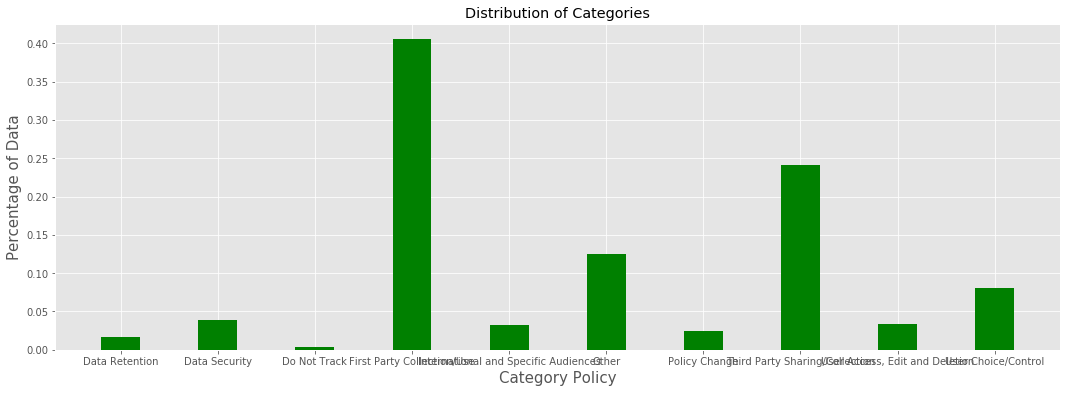

In [23]:
# TODO: Make this plot better
"""
Combine all dataframes for 115 Privacy Policies into a dataframe
and process segments, paragraphs.
    
Args:
    annotations (dict) : A dictionary of annotations where text from a privacy
    policy is and collatted in a dataframe.
Returns:
    all_df (dataframe) : Combined dataframe
"""
def plot_categories(annotations):
    total_count = len(all_df_categories)
    cat_count = {}
    cat_weight = {}
    for cat in categories:
        cat_dict = Counter(all_df_categories[cat])
        cat_count[cat] = cat_dict[1.0]/total_count
        cat_weight[cat] = (math.ceil(total_count/cat_dict[0.0]), math.ceil(total_count/cat_dict[1.0]))
    plt.figure(figsize=(18,6))
    plt.bar(cat_count.keys(), cat_count.values(), color='g', width=0.4)
    plt.xlabel('Category Policy', fontsize=15)
    plt.ylabel('Percentage of Data', fontsize=15)
    plt.title('Distribution of Categories')
    plt.show()
plot_categories(annotations)

In [164]:
all_df_categories
pd.options.display.max_columns = None
display(all_df_categories)


Data Retention  Data Security  Do Not Track  First Party Collection/Use  \
0               0.0            0.0           0.0                         0.0   
1               0.0            0.0           0.0                         0.0   
2               0.0            0.0           0.0                         0.0   
3               0.0            0.0           0.0                         0.0   
4               0.0            0.0           0.0                         0.0   
5               0.0            0.0           0.0                         0.0   
6               0.0            0.0           0.0                         0.0   
7               0.0            0.0           0.0                         0.0   
8               0.0            0.0           0.0                         1.0   
9               0.0            0.0           0.0                         1.0   
10              0.0            0.0           0.0                         1.0   
11              0.0            0.0           0.0                         1.0   
12              0.0            0.0           0.0                         1.0   
13              0.0            0.0           0.0                         0.0   
14              0.0            0.0           0.0                         0.0   
15              0.0            0.0           0.0                         0.0   
16              0.0            0.0           0.0                         1.0   
17              0.0            0.0           0.0                         1.0   
18              0.0            0.0           0.0                         0.0   
19              0.0            0.0           0.0                         1.0   
20              0.0            0.0           0.0                         1.0   
21              0.0            0.0           0.0                         1.0   
22              0.0            0.0           0.0                         1.0   
23              0.0            0.0           0.0                         1.0   
24              0.0            0.0           0.0                         1.0   
25              0.0            0.0           0.0                         1.0   
26              0.0            0.0           0.0                         1.0   
27              0.0            0.0           0.0                         1.0   
28              0.0            0.0           0.0                         1.0   
29              0.0            0.0           0.0                         1.0   
..              ...            ...           ...                         ...   
85              0.0            0.0           0.0                         0.0   
86              0.0            0.0           0.0                         0.0   
87              0.0            0.0           0.0                         0.0   
88              0.0            0.0           0.0                         0.0   
89              0.0            0.0           0.0                         0.0   
90              0.0            0.0           0.0                         0.0   
91              0.0            0.0           0.0                         0.0   
92              0.0            0.0           0.0                         0.0   
93              0.0            0.0           0.0                         0.0   
94              0.0            0.0           0.0                         0.0   
95              0.0            0.0           0.0                         0.0   
96              0.0            0.0           0.0                         0.0   
97              0.0            0.0           0.0                         0.0   
98              0.0            0.0           0.0                         1.0   
99              0.0            0.0           0.0                         0.0   
100             0.0            0.0           0.0                         0.0   
101             0.0            0.0           0.0                         0.0   
102             0.0            0.0           0.0                         0.0   
103  

### Finally, all the preprocessing (almost) is done. Now we can finally move forward.

## Machine Learning Algorithms

After analysing the data that we are working with, we realized that SVM would be one of the better options.

### SVM
In machine learning, support vector machines (SVMs, also support vector networks[1]) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier (although methods such as Platt scaling exist to use SVM in a probabilistic classification setting). An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall. (Source: Wikipedia)

### Reasons For Selecting SVM 
- SVMs has the ability to learn independent of the dimensionality of the feature space.
- Since the maximum margin is drawn based only on the support vectors and not the number of features, it can generalize even in the presence of very many features
- SVM is very robust, eliminating the need for expensive parameter tuning which plagues other methods.
- Text categorize problems are linearly separable which fits into the behaviour of SVM. 
- SVM is good for cases where there is sparse data. Since the document vectors are sparse, SVM will perform well on it.


In [80]:
#source: https://buhrmann.github.io/tfidf-analysis.html
"""
Analyse Confusion Matrix
    
Args: 
    confusion_matrix (numpy matrix) : Confusion Matrix
Returns:
    measures (dict) : A dictionary of scores on various metrics
"""
def analyse_confusion_matrix(conf_mat):
    tp, fp, fn, tn = conf_mat.flatten()
    measures = {}
    measures['accuracy'] = (tp + tn) / (tp + fp + fn + tn)
    measures['specificity'] = tn / (tn + fp)        
    measures['sensitivity'] = tp / (tp + fn)    
    measures['precision'] = tp / (tp + fp)
    measures['f1score'] = 2*tp / (2*tp + fp + fn)
    return measures

In [27]:
def evaluate(y_pred, y_test):
    """ Evaluates classifier predictions
        Inputs:
            y_pred (array_like): output from classifier
            y_test (array_like): true class label
        Output:
            (double): accuracy rate as defined above
    """
    len_range=len(y_test)
    count = float(np.sum(y_pred==y_test))
    accuracy = (count)/len_range
    return accuracy
    pass

In [120]:
"""
Build Category Models
    
Args: 
    confusion_matrix (numpy matrix) : Confusion Matrix
Returns:
    measures (dict) : A dictionary of scores on various metrics
"""
def build_category_models(categories_list, cross_validate = True):
    vectorizer_dict = {}
    model_dict = {}
    false_pos = {}
    false_neg = {}
    cat_corpus = {}
    cat_TFIDF = {}
    cat_labels = {}
    cat_accuracy = {}
    cat_confusion_matrix_dict = {}
    cat_score_dict = {}
    
    
    for cat in categories_list:
        print("Working on Category :",cat)
        exp_df = pd.DataFrame()
        exp_df[cat]=all_df_categories[cat]
        exp_df['segment ID']=all_df_categories['segment ID']
        exp_df['collated_sentences']=all_df_categories['collated_sentences']
        exp_df = exp_df.drop_duplicates(subset=['segment ID',cat,'collated_sentences'], keep='first')

        corpus = exp_df['collated_sentences'].values
        labels = exp_df[cat].reset_index(drop=True)
        print("Total Length of Corpus, Labels :",len(labels))
        
        totalsvm = 0           
        ConfusionMat = np.zeros((2,2));
        scores_kfold = []
        false_pos[cat] = set()
        false_neg[cat] = set()

        
        if (cross_validate):
        
            kf = StratifiedKFold(n_splits=2, shuffle=True)

            modelSVC = SVC(kernel='linear', class_weight='balanced')
            for train_index, val_index in kf.split(corpus,labels):
                X_train = [corpus[i] for i in train_index]
                X_val = [corpus[i] for i in val_index]
                y_train, y_val = labels[train_index], labels[val_index]

                vectorizer = TfidfVectorizer(ngram_range = (1,3), sublinear_tf=True, use_idf=True, stop_words='english')
                train_corpus_tf_idf = vectorizer.fit_transform(X_train)
                val_corpus_tf_idf = vectorizer.transform(X_val)
                


                modelSVC.fit(train_corpus_tf_idf,y_train)
                resultSVC_labels = np.squeeze(modelSVC.predict(val_corpus_tf_idf))
                scores_kfold.append(evaluate(resultSVC_labels, y_val))

            print("Scores with cross validation:", scores_kfold)
            ConfusionMat = confusion_matrix(y_val, resultSVC_labels)
            cat_confusion_matrix_dict[cat] = ConfusionMat

            #Collect indices of false positive and negatives
            fp_idx = np.where((resultSVC_labels==1) & (y_val==0))[0]
            fn_idx = np.where((resultSVC_labels==0) & (y_val==1))[0]
            
            
            #Update Category values in dictionary
            false_pos[cat].update(val_index[fp_idx])
            false_neg[cat].update(val_index[fn_idx])
#             cat_accuracy[cat] = scores
            vectorizer_dict[cat]=vectorizer
            model_dict[cat]= modelSVC
            cat_corpus[cat] = corpus[train_index]
            cat_TFIDF[cat] = train_corpus_tf_idf
            cat_labels[cat] = y_train
            cat_score_dict[cat] = analyse_confusion_matrix(ConfusionMat)
#             print("For category :",val)
#             print ("Confusion Matrix :\n",ConfusionMat)
#             print(analyse_confusion_matrix(ConfusionMat))
#             print(" ")
            
            
        else:
            print("Building Model")
            vectorizer = TfidfVectorizer(min_df=5, max_df = 0.8, ngram_range = (1,3), sublinear_tf=True, use_idf=True, stop_words='english')
            #building TF-IDF Matrix
            X = vectorizer.fit_transform(corpus)
            #splitting the dataset
            P = np.random.permutation(X.shape[0])
            test_index = math.floor(0.8*len(P))
            train_indexes=P[0:test_index]
            test_indexes=P[test_index:]
            print("test_indexes", test_indexes)
            X_train = X[train_indexes]
            X_test = X[test_indexes]
            y_train = labels[train_indexes]
            y_test = labels[test_indexes]
            #train classifier
            clf = SVC(kernel='linear', class_weight='balanced')
            print("Shape :", X_train.shape, y_train.shape)
            clf.fit(X_train, y_train)
            #predict and evaluate predictions
            predictions = clf.predict(X_test)
            #false positive and negatives
            fp_idx = np.where((predictions==1) & (y_test==0))[0]
            fn_idx = np.where((predictions==0) & (y_test==1))[0]
            print("fp_idx",fp_idx)
            print("fn_idx",fn_idx)
            #Update Category values in dictionary
            false_pos[cat].update(test_indexes[fp_idx])
            false_neg[cat].update(test_indexes[fn_idx])
            
            vectorizer_dict[cat]=vectorizer
            model_dict[cat]=clf
            cat_corpus[cat] = corpus[train_indexes]
            cat_TFIDF[cat] = X_train
            cat_labels[cat] = y_train
        
            ConfusionMat = confusion_matrix(y_test, predictions)
            cat_confusion_matrix_dict[cat] = ConfusionMat
#             print("For category :",cat)
#             print ("Confusion Matrix :\n",ConfusionMat)
#             print(analyse_confusion_matrix(ConfusionMat))
#             print(" ")
            cat_score_dict[cat] = analyse_confusion_matrix(ConfusionMat)
            
            
    return(model_dict, vectorizer_dict, false_pos, false_neg, cat_corpus, cat_TFIDF, cat_labels, cat_confusion_matrix_dict, cat_score_dict)

In [121]:
categories_list = ['Data Retention', 'Data Security', 'Do Not Track', 'First Party Collection/Use', 'International and Specific Audiences', 'Other', 'Policy Change', 'Third Party Sharing/Collection','User Access, Edit and Deletion', 'User Choice/Control']
model_dict, vectorizer_dict, false_pos, false_neg, cat_corpus, cat_TFIDF, cat_labels, cat_confusion_matrix_dict, cat_score_dict = build_category_models(categories_list, False)

Working on Category : Data Retention
Total Length of Corpus, Labels : 10444
Building Model
test_indexes [3636 4758 2578 ..., 6777 2993 7396]
Shape : (8355, 22656) (8355,)
fp_idx [  97  147  151  226  296  399  478  481  484  510  541  601  671  694  709
  790  799  885  943  962 1053 1057 1059 1068 1163 1263 1331 1333 1410 1471
 1661 1677 1730 1751 1760 1762 1770 1793 1826 1852 1862 1894 1921 1927 2044
 2078]
fn_idx [  32   50  131  134  156  251  378 1032 1124 1207 1270 1317 1517 1710 1746
 1761 1947 2070 2072 2084]
Working on Category : Data Security
Total Length of Corpus, Labels : 10489
Building Model
test_indexes [9097 1285 7104 ..., 3507 7785 7030]
Shape : (8391, 22751) (8391,)
fp_idx [  52   62  125  149  168  284  293  295  330  357  369  448  451  471  496
  544  547  562  593  595  607  638  653  660  666  673  709  716  749  753
  809  825  846  848  986  991 1035 1058 1084 1151 1157 1166 1226 1254 1263
 1307 1402 1410 1436 1561 1597 1651 1661 1665 1703 1748 1824 1856 1860 1

test_indexes [9876 2561  121 ..., 3311  567 9261]
Shape : (8367, 22710) (8367,)
fp_idx [   0   21   22   24   36   52   81  118  120  130  137  340  421  591  604
  608  647  857  916  991 1148 1152 1224 1353 1437 1517 1552 1679 1739 1755
 1842 1866 1867 1969 1998 2091]
fn_idx [  13   27   59   66  364  407  443  453  478  481  586  618  695  725  729
  889  978 1031 1040 1093 1204 1375 1413 1453 1460 1494 1675 1743 1776 1803
 1808 1816 1818 1916 1963]
Working on Category : User Choice/Control
Total Length of Corpus, Labels : 10541
Building Model
test_indexes [ 2410 10166   742 ...,  5008  4813  3381]
Shape : (8432, 22806) (8432,)
fp_idx [   5   21   30   34   36   49   68   70   88   98  114  115  134  149  150
  157  194  208  213  231  267  279  281  292  319  354  361  365  366  370
  373  377  404  410  414  420  443  458  471  500  510  514  523  528  543
  550  569  571  572  602  642  649  664  670  742  748  753  759  771  774
  815  820  855  886  888  961  962  970  975 1007

In [122]:
print(false_pos['Data Retention'])

{6273, 9602, 8833, 2821, 1928, 1801, 8970, 2189, 5134, 5262, 2707, 289, 2725, 298, 7981, 4271, 9264, 1200, 1586, 1203, 1201, 4277, 3247, 7991, 4407, 6843, 840, 6218, 8395, 6219, 1613, 3018, 3793, 92, 4702, 478, 8927, 5228, 8181, 4342, 4983, 2040, 2041, 4346, 4347, 2175}


## Confusion Matrix

In the field of machine learning and specifically the problem of statistical classification, a confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one (in unsupervised learning it is usually called a matching matrix). Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class (or vice versa). The name stems from the fact that it makes it easy to see if the system is confusing two classes (i.e. commonly mislabeling one as another). [__Source- Wikipedia__]

In [48]:
"""
Build Features from vectorizers for each category 
    
Args: 
    confusion_matrix (numpy matrix) : Confusion Matrix
Returns:
    measures (dict) : A dictionary of scores on various metrics
"""

features = {}
for cat in categories_list:
    print(cat, "\n")
    features[cat] = vectorizer_dict[cat].get_feature_names()

Data Retention 

Data Security 

Do Not Track 

First Party Collection/Use 

International and Specific Audiences 

Other 

Policy Change 

Third Party Sharing/Collection 

User Access, Edit and Deletion 

User Choice/Control 



In [49]:
def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

In [50]:
def top_feats_in_doc(Xtr, features, row_id, top_n=25):
    ''' Top tfidf features in specific document (matrix row) '''
    row = np.squeeze(Xtr[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

In [51]:
print(cat_corpus['Data Retention'][0])
top_feats_in_doc(cat_TFIDF['Data Retention'], features['Data Retention'], 0, top_n=25)

required submit name home email address may choose become registered user order greater access clubhouse information used provide hrca clubhouse service


feature     tfidf
0                  clubhouse  0.359725
1               provide hrca  0.228852
2             hrca clubhouse  0.224683
3                submit home  0.221072
4       required submit home  0.221072
5          submit home email  0.221072
6   information used provide  0.221072
7       email address choose  0.217886
8                 user order  0.207942
9            required submit  0.205937
10                      hrca  0.202326
11            address choose  0.202326
12                home email  0.199141
13        home email address  0.199141
14                   greater  0.194972
15              used provide  0.192512
16           registered user  0.177546
17                      home  0.155316
18                registered  0.150684
19          information used  0.129774
20                    submit  0.123054
21                  required  0.117092
22                    choose  0.106368
23             email address  0.105838
24                     order  0.098274

In [35]:
def top_mean_feats(Xtr, features, grp_ids=None, min_tfidf=0.1, top_n=25):
    ''' Return the top n features that on average are most important amongst documents in rows
        indentified by indices in grp_ids. '''
    if grp_ids:
        D = Xtr[grp_ids].toarray()
    else:
        D = Xtr.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    print(D.shape)
    print(tfidf_means.shape)
    return top_tfidf_feats(tfidf_means, features, top_n)

In [36]:
top_mean_feats(cat_TFIDF['Data Retention'], features['Data Retention'], grp_ids=None, min_tfidf=0.1, top_n=25)

(8355, 22656)
(22656,)


feature     tfidf
0                privacy  0.009422
1                  cooky  0.008668
2                 policy  0.008404
3         privacy policy  0.007256
4   personal information  0.006698
5               personal  0.006547
6                  party  0.006544
7                contact  0.006497
8                   user  0.006388
9                  share  0.006356
10               account  0.006318
11                 email  0.006303
12                 child  0.006094
13                  site  0.005899
14               website  0.005823
15                change  0.005733
16               service  0.005654
17                   com  0.005445
18               company  0.005392
19           advertising  0.005156
20               address  0.005082
21                   opt  0.005074
22       use information  0.004780
23                  time  0.004735
24                  mail  0.004713

In [37]:
def top_feats_by_class(Xtr, y, features, min_tfidf=0.1, top_n=25):
    ''' Return a list of dfs, where each df holds top_n features and their mean tfidf value
        calculated across documents with the same class label. '''
    dfs = []
    labels = np.unique(y)
    for label in labels:
        ids = np.where(y==label)
        feats_df = top_mean_feats(Xtr, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs

(8186, 22656)
(22656,)
(169, 22656)
(22656,)


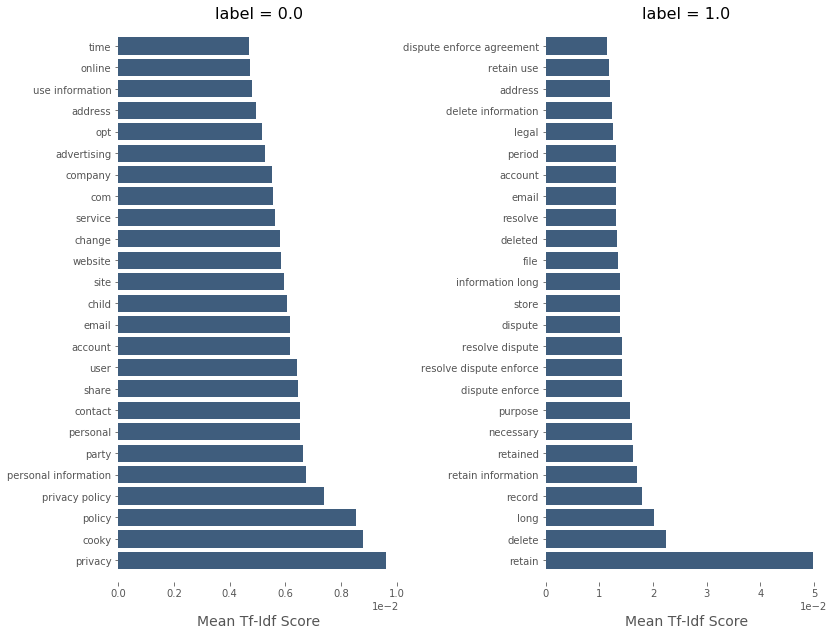

In [38]:
dfs = top_feats_by_class(cat_TFIDF['Data Retention'], cat_labels['Data Retention'], features['Data Retention'], min_tfidf=0.1, top_n=25)
plot_tfidf_classfeats_h(dfs)

In [39]:
for cat in categories_list:
    print(cat, "\n")
    fn = list(false_neg[cat])
    print("length of false negatives :", len(fn))
    print(cat_TFIDF[cat].shape)
    top_mean_feats(cat_TFIDF[cat], features[cat], grp_ids=fn, min_tfidf=0.1, top_n=10)

Data Retention 

length of false negatives : 23
(8355, 22656)


IndexError: index (8928) out of range

In [84]:
"""
collate_all_sub_categories

Args: 
    confusion_matrix (numpy matrix) : Confusion Matrix
Returns:
    measures (dict) : A dictionary of scores on various metrics
"""
def collate_all_sub_categories(annotations):
    all_df_category = {}
    
    # Create dataframe by combining values from all files
    all_df = pd.DataFrame()
    for key, val in annotations.items():
        sub_cat_df = pd.DataFrame()
        sub_cat_df = annotations[key].drop(['collated_sentences'], axis=1)
        all_df = all_df.append(sub_cat_df)
    all_df_sub_categories = all_df.fillna(value=0.0)
    
    for cat in categories:
        sub_df = all_df_sub_categories.loc[all_df_sub_categories[cat] == 1]
        print("Processing category", cat," length: ", len(sub_df))
        new_df = pd.DataFrame()
        new_df = new_df.reindex(columns = sub_categories[cat])
        new_df[cat]=sub_df[cat]
        new_df['segment ID']=sub_df['segment ID']
        new_df['segment']=sub_df['segment']
        new_df['sub_categories_dictionary']=sub_df['sub_categories_dictionary']
        print(new_df['sub_categories_dictionary'])
        for index, row in new_df.iterrows():
            for key, val in row['sub_categories_dictionary'].items():
                print("val is :", val)
                new_df.loc[index, key]=preprocess(val)
#         print(new_df.head())
        all_df_category[cat]=new_df
    return all_df_category
all_df_sub_categories = collate_all_sub_categories(annotations)

Processing category Data Retention  length:  348
191    {'Personal Information Type': ' Accessing and ...
195    {'Retention Period': 'Because of this, after y...
197    {'Retention Purpose': 'We aim to maintain our ...
49     {'Personal Information Type': 'ACC does not re...
37     {'Personal Information Type': 'If a visitor ch...
38     {'Personal Information Type': 'If a visitor ch...
58     {'Personal Information Type': 'In addition to ...
10     {'Personal Information Type': 'gov, we may sto...
11     {'Personal Information Type': 'gov, date and t...
12     {'Personal Information Type': 'gov, date and t...
13     {'Personal Information Type': 'gov, the name o...
31     {'Retention Period': 'Raw data logs are used f...
33     {'Personal Information Type': 'Raw data logs a...
5      {'Personal Information Type': 'However, the fo...
23     {'Retention Purpose': 'For site management fun...
24     {'Retention Purpose': 'For site management fun...
25     {'Retention Purpose': 'This info

val is : We store search terms (and the cookie IDs associated with search terms) separately from any account information that directly identifies the user, such as name, e-mail address, or phone numbers.
val is : We store search terms (and the cookie IDs associated with search terms) separately from any account information that directly identifies the user, such as name, e-mail address, or phone numbers. We have technological safeguards in place designed to prevent the unauthorized correlation of this data and we remove the entirety of the IP address after 6 months, cookies and other cross session identifiers, after 18 months.
val is : We store search terms (and the cookie IDs associated with search terms) separately from any account information that directly identifies the user, such as name, e-mail address, or phone numbers.
val is : We have technological safeguards in place designed to prevent the unauthorized correlation of this data and we remove the entirety of the IP address aft

val is : If you wish to cancel your or your childs account or request that we no longer use your information to provide you Services contact us at support@lynda.
val is : 
val is : If you wish to cancel your or your childs account or request that we no longer use your information to provide you Services contact us at support@lynda.
val is : 
val is : We will retain and use your information as necessary to comply with our legal obligations, resolve disputes, and enforce our agreements.
val is : We will retain and use this personal information as necessary to comply with our legal obligations, resolve disputes, and enforce our agreements.
val is : com will retain Personally Identifiable Information we process on behalf of our clients for as long as needed to provide our services to our client.
val is : com will retain Personally Identifiable Information we process on behalf of our clients for as long as needed to provide our services to our client.
val is : We will retain and use this pe

val is : Chase Paymentech Solutions, LLC is committed to safeguarding the privacy and security of the information we collect.
val is :  Commitment to Privacy and Security    Chase Paymentech Solutions, LLC and its operating entity Paymentech, LLC (collectively, "Chase Paymentech") are committed to safeguarding the privacy and security of the information we collect. This Privacy Statement explains the policies we follow with respect to the handling of customer information collected by Chase Paymentech. This Privacy Statement covers the services provided by Chase Paymentech to our merchant customers, including merchant customers using the Chase Mobile Checkout application.
val is : Chase Paymentech understands that such information is sensitive and takes appropriate steps to protect the confidentiality and security of all information collected by Chase Paymentech in accordance with this Privacy Statement.
val is : Chase Paymentech understands that such information is sensitive and takes 

val is : When you use our services or view content provided by Google, we automatically collect and store certain information in server logs.
val is : 
val is : When you use our services or view content provided by Google, we automatically collect and store certain information in server logs.
val is : 
val is : Log information 
val is : When you use our services or view content provided by Google, we automatically collect and store certain information in server logs.
val is : 
val is : Log information 
val is : When you use our services or view content provided by Google, we automatically collect and store certain information in server logs.
val is : 
val is : Log information 
val is : When you use our services or view content provided by Google, we automatically collect and store certain information in server logs.
val is : 
val is : Log information 
val is : When you use our services or view content provided by Google, we automatically collect and store certain information in server 

val is : When you visit USA.gov, we may store some or all of the following: the Internet protocol address from which you access USA.
val is : gov, date and time, the name of the web site from which you linked to USA.
val is : 
val is :  Information Collected and Stored Automatically  
val is : gov, we may store some or all of the following: the Internet protocol address from which you access USA.
val is : 
val is :  Information Collected and Stored Automatically  
val is : gov, we may store some or all of the following: the Internet protocol address from which you access USA.
val is : gov, we may store some or all of the following: the Internet protocol address from which you access USA.gov, date and time, the name of the web site from which you linked to USA.gov, the name of the file or words you searched, items clicked on a page, and the browser and operating system used.
val is : 
val is :  Information Collected and Stored Automatically  
val is : gov, we may store some or all of th

val is : We may use the information you provide about yourself or others to fulfill requests for our publications, products or services, to respond to inquiries about offerings and to offer other products, programs or services that may be of interest.
val is : We may use the information you provide about yourself or others to fulfill requests for our publications, products or services, to respond to inquiries about offerings and to offer other products, programs or services that may be of interest.
val is : We may use the information you provide about yourself or others to fulfill requests for our publications, products or services, to respond to inquiries about offerings and to offer other products, programs or services that may be of interest.
val is :  How We Use the Information  
val is : We may use the information you provide about yourself or others to fulfill requests for our publications, products or services, to respond to inquiries about offerings and to offer other products,

val is : 
val is : com Terms of Use, or as otherwise required by law.
val is : In addition to the uses identified above, we may use the information that we collect for any other purposes disclosed to you at the time we collect your information or pursuant to your consent.
val is : In addition to the uses identified above, we may use the information that we collect for any other purposes disclosed to you at the time we collect your information or pursuant to your consent.
val is : We collect information from and about you.
val is : Contact information. For example, we might collect your name and street address. We might also collect your phone number or email.
val is : 
val is : For example, we might collect your name and street address. We might also collect your phone number or email.
val is : For example, we might collect your name and street address.
val is : We collect information from and about you.
val is : Payment and billing information.
val is : Payment and billing information

val is : com registration process, we include the contact information you provide us on the Zacks Investment Research opt-in marketing list.
val is : 
val is : com registration process, we include the contact information you provide us on the Zacks Investment Research opt-in marketing list.
val is :  Zacks Investment Research Postal and Telemarketing Lists  
val is : Everyone who submits personal postal and phone number information to Zacks Investment Research online may receive special direct mail and telemarketing offers from outside marketers that may be of interest to you.
val is : 
val is : Everyone who submits personal postal and phone number information to Zacks Investment Research online may receive special direct mail and telemarketing offers from outside marketers that may be of interest to you.
val is :  Zacks Premium  
val is : We collect your credit card information solely for payment of your subscription.
val is : 
val is : You will only be added to the Opt-In Marketing l

val is : What are your Sites advertising practices? 
val is : We, our advertisers, and our third party advertising companies may use information (not including your name, address, email address or telephone number) about your interaction with advertising on our Sites and your visits to this and other Web sites, including information collected through cookies, in order to provide advertisements on our Sites and other sites about goods and services that may be of interest to you.
val is : 
val is : How about childrens privacy? 
val is : We do not knowingly collect information from children under the age of 13 and we do not target the Sites to children under the age of 13.
val is : For U.
val is : Consumer Privacy Notice, which provides choices in the use and sharing of information.
val is : account holders and visitors to this Site, we will use and share any information that we collect from or about you in accordance with the Bank of America U.
val is : 
val is : Personal Information mea

val is : 
val is : We use these cookies to operate Bing and MSN services and provide you a more relevant search experience.
val is : If you sign into Bing or other Microsoft services using a Microsoft account, we will set or read one or more additional cookies.
val is : You can use your browser settings to remove or block cookies on your computer.
val is : We use these cookies to operate Bing and MSN services and provide you a more relevant search experience.
val is : If you sign into Bing or other Microsoft services using a Microsoft account, we will set or read one or more additional cookies.
val is : You can use your browser settings to remove or block cookies on your computer.
val is : We use these cookies to operate Bing and MSN services and provide you a more relevant search experience.
val is : When you use Bing and MSN services with a web browser, we will place one or more "cookies" on your machine.
val is : You can use your browser settings to remove or block cookies on your c

val is :   communicate with you by mail, telephone, facsimile, e-mail, mobile alerts and SMS text messaging about NOTMC or our affiliates, including communications about your itineraries or purchases, your services, accounts, sweepstakes or contests you enter, your requests for information or other items, and to update you about changes to our Online Services  
val is :   communicate with you, including by mail, telephone, facsimile, e-mail, mobile alerts and SMS text messaging, in connection with our marketing efforts, including sending you offers and promotions that you can take advantage of through our Online Services or at relevant physical venues around or near New Orleans and offer personalized collection, filtering, and delivery of information, including serving advertisements while you are visiting New Orleans.
val is :   communicate with you, including by mail, telephone, facsimile, e-mail, mobile alerts and SMS text messaging, in connection with our marketing efforts, includi

val is : , age, gender, 5-digit zip code) and use of the Sites.
val is : 
val is : , your name, email address, telephone number, postal address, credit card information) and (2) non-personal information, which is information that does not personally identify you but may include information about your interests, demographics (e.
val is : We collect two basic types of information from you in conjunction with your use of the Sites: (1) personal information, which is any information that individually identifies you (e.
val is : , your name, email address, telephone number, postal address, credit card information) and (2) non-personal information, which is information that does not personally identify you but may include information about your interests, demographics (e.
val is : 
val is : We collect two basic types of information from you in conjunction with your use of the Sites: (1) personal information, which is any information that individually identifies you (e.
val is : , your name, 

val is : This profile is used to tailor a user's visit to our Web site, and to direct pertinent marketing promotions to them.
val is :  Information Use  
val is : We store information that we collect through cookies, log files, clear gifs, and/or third parties to create a profile of our users.
val is : 
val is : Consequently, collected information is tied to the users personally identifiable information to provide offers and improve the content of the site for the user.
val is : This profile is used to tailor a user's visit to our Web site, and to direct pertinent marketing promotions to them.
val is : Cookies 
val is : We use both session ID cookies [and] persistent cookies.
val is : 
val is : Cookies 
val is : We use both session ID cookies [and] persistent cookies.
val is : 
val is : We use cookies to enhance the RedOrbit experience.
val is : If users reject the cookie, they may still use our site.
val is : 
val is : We use cookies to enhance the RedOrbit experience.
val is : We use

val is : 
val is : This information is stored and used in the aggregate only, and is not used to contact you personally: 
val is :  Cookies  
val is : Cookies, which are small pieces of information sent to your browser by a website that you visit, are used to track usage patterns, traffic trends and customer behavior, as well as to record other information from the Website.
val is : 
val is :  Cookies  
val is : Cookies, which are small pieces of information sent to your browser by a website that you visit, are used to track usage patterns, traffic trends and customer behavior, as well as to record other information from the Website.
val is : 
val is : When you register on the Websites, cookies also allow us to save information so that you will not have to re-enter it the next time you visit.
val is : When you register on the Websites, cookies also allow us to save information so that you will not have to re-enter it the next time you visit. Many content adjustments and customer servic

val is : Personal Profile or Service Information helps us with the administration and personalization of your personal profiles or services, such as areas of interest, information from social media interactions (such as Facebook, Twitter, or Google+), preferences, physical characteristics (such as height, weight), photographs and, biographical, health information and/or demographic information (such as gender).
val is : Personal Profile or Service Information helps us with the administration and personalization of your personal profiles or services, such as areas of interest, information from social media interactions (such as Facebook, Twitter, or Google+), preferences, physical characteristics (such as height, weight), photographs and, biographical, health information and/or demographic information (such as gender).
val is : Personal Profile or Service Information helps us with the administration and personalization of your personal profiles or services, such as areas of interest, in

val is : Location information . This information can include, for example, your device's GPS signal and information about nearby WiFi networks and cell towers. We get this information when you use location-enabled services like MapQuest, which can give you driving directions based on your current location.
val is : We get this information when you use location-enabled services like MapQuest, which can give you driving directions based on your current location.
val is : Location information .
val is : Location information . This information can include, for example, your device's GPS signal and information about nearby WiFi networks and cell towers. We get this information when you use location-enabled services like MapQuest, which can give you driving directions based on your current location.
val is : Please note that AOL may use information about your use of certain AOL communication tools (for example, AOL Mail and AOL Instant Messenger); however, when you use AOL communication tool

val is : 
val is : The Service generally collects personally identifiable information with your specific knowledge and consent.
val is : For instance, when you enter a sweepstakes or contest, complete a survey, make a purchase, subscribe to our publication(s), register for certain services, or register and/or set up an account/profile to access, visit and/or use certain portions of the Service, or the Service as a whole, you may be provided, or required to choose, a password and/or User ID, and you may provide a credit, debit, or charge card number, or other payment information, as well as your name, telephone number(s), email and/or street address, and other personally identifiable information.
val is : 
val is : The Service generally collects personally identifiable information with your specific knowledge and consent.
val is : For instance, when you enter a sweepstakes or contest, complete a survey, make a purchase, subscribe to our publication(s), register for certain services, or 

val is : Information You Submit.
val is : Information You Submit. You give us personal information when you join one of our loyalty clubs, enter one of our surveys, contests or sweepstakes, if you submit a question, comment or complaint, if you request or submit information about becoming a franchisee, if you submit an employment application, or for an online cake order. "Personal information" means any information about an identifiable individual, such as name, address, phone number, email, birth date, gender or zip code/postal code. Except with your consent or as required or permitted by law, we will use the information you submit for the purposes for which it is submitted or as otherwise described in this privacy statement.
val is : Information You Submit. You give us personal information when you join one of our loyalty clubs, enter one of our surveys, contests or sweepstakes, if you submit a question, comment or complaint, if you request or submit information about becoming a fran

val is : The information you share with American Honda when you apply for employment with American Honda or any of its affiliated companies through our site at http://corporate.honda.com/careers/ may include personal information, such as name, educational and employment background, contact information, job qualifications, and jobs for which you may wish to be considered.
val is : The information you share with American Honda when you apply for employment with American Honda or any of its affiliated companies through our site at http://corporate.honda.com/careers/ may include personal information, such as name, educational and employment background, contact information, job qualifications, and jobs for which you may wish to be considered. You may choose to provide additional information, such as your resume or CV, employment references, and salary requirements. You may also choose to provide this information by extracting it from another online location, such as Google, Yahoo, or Talent

val is : Credit applications or from other forms that you give us (for example, your name, address, social security number, income and obligations); 
val is : Credit reporting agencies (for example, your creditworthiness and credit history); 
val is : 
val is : Credit applications or from other forms that you give us (for example, your name, address, social security number, income and obligations); 
val is : The American Honda Finance Corporation family of companies on transactions with us that you have conducted (for example, products that you have purchased, financed or leased, your retail or lease account balance and payment history).
val is : 
val is : In doing so, you will be required to provide your email address and occupation, and asked to submit your first name, last name, country of origin, and organization.
val is : 
val is : Email Newsletters. You may decide that you wish to sign up to receive email newsletters on Honda environmentally responsible products technology, green

val is : When you are logged into your reddit account, we save the following information about your preferences and your interactions with the site to allow you to customize your experience: subscriptions, preferred language, all languages you see content in, accumulated karma, voting data, and date of last login.
val is : You may also opt to add "flair" to decorate your profile, and this will be stored as well.
val is : 
val is : When you are logged into your reddit account, we save the following information about your preferences and your interactions with the site to allow you to customize your experience: subscriptions, preferred language, all languages you see content in, accumulated karma, voting data, and date of last login.
val is : When you are logged into your reddit account, we save the following information about your preferences and your interactions with the site to allow you to customize your experience: subscriptions, preferred language, all languages you see content in

val is : If you have set up your Internet browser to ignore or disable pop-ups, you will not be able to be randomly selected for the survey. If you have disabled JavaScript in your browser, but are interested in responding to our survey if randomly selected, you will want to enable JavaScript and reload the website now.
val is : 
val is : The Frederick News-Post and its owner, Randall Family, LLC (collectively, "The News-Post"), recognize the importance of protecting the privacy of personally identifiable information collected about you, our customers.
val is : The News-Post gathers identifying information about you only when you provide that information on a voluntary basis for such purposes as member or subscriber registration, reader comments and blogs, contests, news alerts, purchasing products and using social networking tools.
val is : The News-Post gathers identifying information about you only when you provide that information on a voluntary basis for such purposes as member or

val is : Analytic Metrics Tools and Other Technologies: Other information that may be passively collected by the Company includes log files that record information about your hardware, product use, service use, or website use, including website navigation and game telemetry activity.
val is : We also use these log file entries for our internal marketing, service design, technical support, and demographic studies, so we can constantly improve the Online Services we provide you.
val is : Analytic Metrics Tools and Other Technologies: Other information that may be passively collected by the Company includes log files that record information about your hardware, product use, service use, or website use, including website navigation and game telemetry activity.
val is : We also use these log file entries for our internal marketing, service design, technical support, and demographic studies, so we can constantly improve the Online Services we provide you.
val is : WHO IS COLLECTING MY INFORM

val is : 
val is : We also collect and store information through a variety of automatic technologies, such as browser and flash cookies, pixels and web beacons about your use of our Site, including device identifying information such as IP addresses, MAC address or other device-specific alphanumerical ID numbers, the make and model of your device, the wireless provider associated with your device, whether you downloaded the app, the source of the download of the App (for example, whether via a particular advertisement for the App), when the App is launched, how many times a particular page within the Site is visited, which features the users interact with, and your device or computer's connection to the Internet.
val is : 
val is : We also collect and store information through a variety of automatic technologies, such as browser and flash cookies, pixels and web beacons about your use of our Site, including device identifying information such as IP addresses, MAC address or other devic

val is : We may use demographic and preference information to allow advertising on the SIDEARM Services to be targeted to the users for whom they are most pertinent.
val is : 
val is : We may use demographic and preference information to allow advertising on the SIDEARM Services to be targeted to the users for whom they are most pertinent. This means users see advertising that is most likely to interest them, and advertisers send their messages to people who are most likely to be receptive, improving both the viewer's experience and the effectiveness of the ads.
val is : We may use demographic and preference information to allow advertising on the SIDEARM Services to be targeted to the users for whom they are most pertinent.
val is : Email Newsletters 
val is : SIDEARM Sports will periodically send you email newsletters or promotional email about services offered by SIDEARM Sports and its advertisers.
val is : 
val is : SIDEARM Sports will periodically send you email newsletters or pro

val is :   We use persistent cookies to:    Help us maintain security and verify your details whilst you use the website as you navigate from page to page, which enables you to avoid having to re-enter your details each time you enter a new page.
val is :  
val is :   We use persistent cookies to:    Help us maintain security and verify your details whilst you use the website as you navigate from page to page, which enables you to avoid having to re-enter your details each time you enter a new page.
val is :  
val is : 
val is :   We use persistent cookies to:    Help us maintain security and verify your details whilst you use the website as you navigate from page to page, which enables you to avoid having to re-enter your details each time you enter a new page.
val is :  
val is :   We use persistent cookies to:    Help us maintain security and verify your details whilst you use the website as you navigate from page to page, which enables you to avoid having to re-enter your details e

val is : By tracking how and when you use the Website, cookies help us determine which areas are popular and which are not. Many improvements and updates to the Website are based on data obtained from cookies.
val is : Cookies automatically identify your browser to the Website whenever your computer is used to visit the Website.
val is : If you do not want information collected through the use of cookies, your browser should contain an option that allows you to disable or delete cookie data at any time.
val is : 
val is : Cookies are not tied to personal information.
val is : Accepting cookies allows you, among other things, to personalize your experience on the Website.
val is : Cookies automatically identify your browser to the Website whenever your computer is used to visit the Website.
val is : If you do not want information collected through the use of cookies, your browser should contain an option that allows you to disable or delete cookie data at any time.
val is : 
val is : Co

val is : Collecting this information, and linking it with your personally-identifiable information, helps us to best tailor our website and enhance your online experience by saving your preferences while you are visiting a particular site, and to help identify site features, recipes, advertisements, and offers that may be of particular interest to you.
val is : We may use cookies, web beacons/pixel tags, log files, and other technologies to collect certain information about visitors to our website, use of our online services, and interactions with our emails and online advertisements.
val is : 
val is : Collecting this information, and linking it with your personally-identifiable information, helps us to best tailor our website and enhance your online experience by saving your preferences while you are visiting a particular site, and to help identify site features, recipes, advertisements, and offers that may be of particular interest to you.
val is : We may use cookies, web beacons/pi

val is : We collect a variety of information about you, including:     Information you provide directly to a CBS Interactive Services.
val is : We collect a variety of information about you, including: 
val is : 
val is :  
val is : 
val is :  
val is : 
val is :  
val is :   Information you provide directly to a CBS Interactive Services.
val is : 
val is :  
val is : 
val is :  
val is : 
val is : Information Collected 
val is : We use the information we collect to: 
val is : 
val is : We use the information we collect to: 
val is : 
val is : We use the information we collect to: 
val is : 
val is : We use the information we collect to: 
val is : 
val is : We use the information we collect to: 
val is : 
val is : We use the information we collect to: 
val is : We use the information we collect to:     Provide the services you request.
val is :   Provide the services you request.
val is : We use the information we collect to: 
val is : 
val is : Use of Information 
val is : 
val is : U

val is :  What Information Do We Collect-  
val is : 
val is :  What Information Do We Collect-  
val is : 
val is :  What Information Do We Collect-  
val is : 
val is :  What Information Do We Collect-  
val is : 
val is : Meredith and our service providers collect a variety of information about you including: 
val is :   Information you choose to provide to us directly when using our Services and information about the computers and devices you use to access our services, including their location.
val is : Meredith and our service providers collect a variety of information about you including: 
val is : 
val is :  What Information Do We Collect-  
val is : 
val is : Meredith and our service providers collect a variety of information about you including: 
val is :  What Information Do We Collect-  
val is : 
val is : Meredith and our service providers collect a variety of information about you including: 
val is :  
val is : 
val is : Some information may be collected automatically th

val is : 
val is : There are circumstances in which we automatically receive and collect information from you.
val is : 
val is : When you visit a Barnes & Noble Website, our web servers may automatically log information that your browser sends us.
val is : 
val is : For example, we may receive and collect: the name of the domain and host from which you access the Internet; the Internet Protocol (IP) address of the computer you are using; the date and time you access the Barnes & Noble Website; and the Internet address of the website from which you linked directly to the Barnes & Noble Website.
val is : We use this information to monitor the usage of the Barnes & Noble Websites and as necessary for our business.
val is : When you visit a Barnes & Noble Website, our web servers may automatically log information that your browser sends us.
val is : 
val is : For example, we may receive and collect: the name of the domain and host from which you access the Internet; the Internet Protocol 

val is : THE MRC and our third party service providers collect information automatically through the use of electronic tools such as web beacons, cookies, Flash, clickstream data, and other automated devices that are deployed on the Website.
val is : We and our third party service providers may collect the following information about your use of our Website via these technologies: your IP address; your browser type and operating system; web pages you view; links you click; your interaction with our Website; length of time you are logged into our Website; and websites visited before our Website.
val is : THE MRC and our third party service providers collect information automatically through the use of electronic tools such as web beacons, cookies, Flash, clickstream data, and other automated devices that are deployed on the Website. We and our third party service providers may collect the following information about your use of our Website via these technologies: your IP address; your b

val is : Most mobile devices allow you to turn off location services.
val is : 
val is : We may use this information to provide you with location-based services, such as advertising, search results, and other personalized content.
val is :   E-mail Communications: To help us make e-mails more useful and interesting, we often receive a confirmation when you open e-mail from Amazon.com if your computer supports such capabilities.
val is :   E-mail Communications: To help us make e-mails more useful and interesting, we often receive a confirmation when you open e-mail from Amazon.
val is : If you do not want to receive e-mail or other mail from us, please adjust your Customer Communication Preferences.
val is : 
val is :   E-mail Communications: To help us make e-mails more useful and interesting, we often receive a confirmation when you open e-mail from Amazon.com if your computer supports such capabilities.
val is :   E-mail Communications: To help us make e-mails more useful and intere

val is : Additionally, some of the Curse Features may collect information regarding your computer system.
val is : 
val is : We use this information to monitor and analyze how users use the Curse Features, to provide customer service and to maintain and improve the Curse Features.
val is : Our servers automatically record information that your browser sends whenever you visit the Site(s).
val is : This information includes your Internet Protocol address, your browser type and version, the search engine you used to find the Curse Features, if any, the operating system your computer uses, the type of computer hardware you have (such as the amount of RAM, the type of GPU or type of CPU in your computer) which Curse Features you use and when and how long you use them.
val is : 
val is : We use this information to monitor and analyze how users use the Curse Features, to provide customer service and to maintain and improve the Curse Features.
val is : Our servers automatically record informa

val is : For example, during account registration, we may ask for information such as your name, e-mail address, year of birth, gender, street address, job title and industry and related information.
val is : 
val is : When you register or otherwise interact with the Services, you may be invited to provide personal information to enhance your experience on our site.
val is : For example, during account registration, we may ask for information such as your name, e-mail address, year of birth, gender, street address, job title and industry and related information.
val is : 
val is : When you register or otherwise interact with the Services, you may be invited to provide personal information to enhance your experience on our site.
val is : We may collect payment information, such as your credit card number and expiration date, where appropriate to process a financial transaction you have requested.
val is : For example, during account registration, we may ask for information such as your 

val is :  Information We Receive From Other Sources  
val is : We receive information about you from other sources to help us correct or supplement our records, improve the quality or personalization of our service to you, and prevent or detect fraud.
val is : 
val is :  Information We Receive From Other Sources  
val is : We receive information about you from other sources to help us correct or supplement our records, improve the quality or personalization of our service to you, and prevent or detect fraud.
val is : 
val is :  Information We Receive From Other Sources  
val is : We collect personal information from consumer reporting agencies in conjunction with products or services that involve financial risk to Walmart, such as transactions in which Walmart extends you financing.
val is : 
val is : We receive information about you from other sources to help us correct or supplement our records, improve the quality or personalization of our service to you, and prevent or detect fraud

val is : In addition, we reserve the right to use the information we collect about your computer, mobile or other device (including its geographic location), which may at times be able to identify you, for any lawful business purpose, including without limitation to help diagnose problems with our servers, to gather broad demographic information, analyze trends, track users' movements around the Service, and to otherwise administer the Service.
val is : Geographic location information about you and/or your computer, mobile or other device may specifically be used to show you content and sponsored messaging based on geographic location.
val is : In addition, we reserve the right to use the information we collect about your computer, mobile or other device (including its geographic location), which may at times be able to identify you, for any lawful business purpose, including without limitation to help diagnose problems with our servers, to gather broad demographic information, analyze

val is : This information may include, but is not limited to, your name, address, telephone number, e-mail address and what you have purchased.
val is : 
val is : This information constitutes personally identifiable information.
val is : In addition to information obtained through registration, the Tulsa World obtains information from you when you purchase advertising or start a newspaper subscription, sign up for contests, promotions, notices, email alerts or promotional offers.
val is : This information may include, but is not limited to, your name, address, telephone number, e-mail address and what you have purchased.
val is : 
val is : This information constitutes personally identifiable information.
val is : In addition to information obtained through registration, the Tulsa World obtains information from you when you purchase advertising or start a newspaper subscription, sign up for contests, promotions, notices, email alerts or promotional offers.
val is : This information cons

val is : Cookies are used to deliver targeted advertising based on your behavior and demographics and to track your entries in promotions and contests.
val is : Cookies may be linked to PIN.
val is : 
val is : Cookies and Web Beacons: Cookies are used to store and track information about you.
val is : Cookies and Web Beacons: Cookies are used to store and track information about you. A cookie is a small amount of data that is sent to your browser from Web sites and stored on your computer's hard drive. Cookies are used to deliver targeted advertising based on your behavior and demographics and to track your entries in promotions and contests.
val is : Cookies and Web Beacons: Cookies are used to store and track information about you.
val is : Cookies and Web Beacons: Cookies are used to store and track information about you. A cookie is a small amount of data that is sent to your browser from Web sites and stored on your computer's hard drive. Cookies are used to deliver targeted adver

val is : Our cookies may contain Personally Identifiable Information and such cookies may be shared with others to the same extent indicated in Section 4.
val is : (i) Hearst (or third party service providers on our behalf) may set and access cookies and similar technologies on your computer.
val is : Hearst uses cookies to understand site usage and to improve the content and offerings on our Covered Sites and in other media.
val is : We may use cookies to control the display of ads, to track usage patterns on the sites, to deliver editorial content, to record requests for subscriptions and to personalize information.
val is : Our cookies may contain Personally Identifiable Information and such cookies may be shared with others to the same extent indicated in Section 4.
val is : (i) Hearst (or third party service providers on our behalf) may set and access cookies and similar technologies on your computer.
val is : Hearst (or third party service providers on our behalf) may also use co

val is : We conduct research on our users' demographics, interests, and behavior based upon the information you provide us when you register or participate in contests or other promotions on our site, or based upon information we receive from other sources.
val is : If you would prefer us not to contact you for these purposes, simply go to our opt-out page and let us know.
val is : We may also notify you of products, services, or areas of our site that we think may interest you based on the information we've received.
val is : 
val is : We conduct research on our users' demographics, interests, and behavior based upon the information you provide us when you register or participate in contests or other promotions on our site, or based upon information we receive from other sources.
val is : We may also notify you of products, services, or areas of our site that we think may interest you based on the information we've received.
val is : We conduct research on our users' demographics, int

val is :  Cookies  
val is : Cookies, by themselves, do not tell us your e-mail address or other personal information unless you choose to provide this information to us by, for example, registering with one of our Services.
val is : A cookie assigns a unique numerical identifier to your Web browser or device, and may enable us to recognize you as the same user who has used our Services, and relate your use of the Services to other information about you, such as your usage information and personal information.
val is : 
val is :  Cookies  
val is : Cookies, by themselves, do not tell us your e-mail address or other personal information unless you choose to provide this information to us by, for example, registering with one of our Services.
val is : A cookie assigns a unique numerical identifier to your Web browser or device, and may enable us to recognize you as the same user who has used our Services, and relate your use of the Services to other information about you, such as your us

val is : For Non-U.S. account holders utilizing this Site, we will use and share your account information in accordance with the privacy disclosure that covers your account and with the privacy and security rules applicable to the Bank of America affiliate or subsidiary that provides that account to you.  
val is : For Non-U.S. account holders utilizing this Site, we will use and share your account information in accordance with the privacy disclosure that covers your account and with the privacy and security rules applicable to the Bank of America affiliate or subsidiary that provides that account to you.
val is :  Protecting childrens privacy online    The Site is not directed to individuals under the age of thirteen (13) and we request that these individuals do not provide Personal Information through the Site. We do not knowingly collect information from children under 13 without parental consent. Visit the Federal Trade Commission website for more information about the Children's 

val is : If we make material changes to how we use Personal Information collected from children under 13, we will notify parents by email in order to obtain verifiable parental consent for the new uses of their childs Personally Identifiable Information.
val is : If you do not want yours or your childs comments to be viewed by third parties, you are advised not to make any submissions.
val is : CALIFORNIA PRIVACY RIGHTS   Under California law, California residents may request once a year, free of charge, certain information regarding MediaNews' disclosure of personal information to third parties for direct marketing purposes. To make such a request, please write to us at: Privacy Coordinator, MediaNews Group Interactive, 101 W. Colfax Ave., Suite 950, Denver, CO 80202.
val is : Under California law, California residents may request once a year, free of charge, certain information regarding MediaNews' disclosure of personal information to third parties for direct marketing purposes.
val

val is : For example, when the e-mail address 'U13user@dictionary.com' is hashed, the result or "hash value" might be 'a8der13ap69'. Every time that hash function is applied to that e-mail address the result will be the same. It is called one-way hashing because the function allows you to convert the data only one way. So while it is possible to convert an e-mail address into a hash value, it is not possible to convert that value back into the e-mail address.
val is : When a child under the age of 13 registers for an account, we use hashing to create a password reminder system that does not require us to retain that child's email address. To do this, we apply the hash function to the email address and associate the resulting hash value (not the e-mail) with the user's account. The e-mail address is immediately discarded after the hash function is applied.
val is : When the user forgets the password associated with the account, we request the original email address, hash it, and then co

val is : Please be aware that this privacy statement and any choices you make on the site will not necessarily apply to personal information you may have provided to Abita in the context of other, separately operated, Abita products or services.
val is : ABITA.COM may send out periodic e-mails informing you of issues related to a product or service you requested, or confirming you requested a product or service such as invoices and confirmations. In some services offered by ABITA.COM, contact with the customer is a necessary part of the service.
val is : It is against our Terms of Use for anyone under 21 to submit data to our site.
val is :  How to Contact Us    If you have any questions or concerns about the ABITA.COM online privacy policy or its implementation you may contact us at: ABITA.COM Customer Care, Attn: Privacy Policy Issues, PO Box 1510, Abita Springs, LA 70420; or online at friends@ABITA.COM 
val is : If you have any questions or concerns about the ABITA.COM online privac

val is : We work with business partners to provide you access to their products and services. For example, our Website includes a link to www.alienware.com. Any information you supply upon entering the www.alienware.com site is collected by Alienware.
val is : This privacy policy covers the use of cookies by GameStop and does not cover the use of cookies or other tracking technologies by any of its advertisers.
val is : If you would like more information about this practice and to know your choices about not having this information used by these companies, please see: http://www.networkadvertising.org/managing/opt_out.asp.
val is : To the extent that you use our Websites, and connect to us through your computer, anyone with access to your computer may be able to access our Websites and conduct transactions in your name. We have no ability to know who has access to your computer, or to your credit card information, or who you have authorized to use such computer or information. Persons 

val is : However, employers, recruiters, and others who have paid for access to that database or to obtain a copy of that database as well as parties who have otherwise gained access to the database may have retained a copy of your resume in their own files or databases.
val is : Please Note: It is not our practice to restrict access to our resume database to any particular customer(s). Please be advised that your current employer or an entity affiliated with your current employer might be a customer of the Science Careers.org sites. We are not responsible for any actions or results that may occur as a result of any customer's access to and/or use of your resume.  
val is : Please Note: It is not our practice to restrict access to our resume database to any particular customer(s). Please be advised that your current employer or an entity affiliated with your current employer might be a customer of the Science Careers.org sites. We are not responsible for any actions or results that may

val is : This Privacy Statement applies to the operations of The Motley Fool, LLC, which serves users in the United States of America, and by using the sites and providing us with personal data you are consenting to our processing data in the United States and under its laws. Data handling practices and rules may differ from country to country. Each Motley Fool entity (e.g., The Motley Fool Limited, which operates fool.co.uk in the United Kingdom) may have different policies, which will apply to (and be stated on) its sites.
val is : While we do our best to protect your personal information, The Motley Fool cannot ensure or warrant the security of any information you transmit to us, and you do so at your own risk. What does all of this mean- Just as in the investing world, you must protect yourself. You are responsible for maintaining the secrecy of any password and/or account information. Please be careful and responsible whenever you are online, especially when using a computer that 

val is : Even if you do not opt-in to receive promotional information or you have opted-in and then later choose to opt-out, we reserve the right to contact you as necessary in our sole discretion regarding The Hill, any request you have made for services or products from The Hill, changes to this Privacy Policy and any other matters that may be relevant to the information we collect.
val is : Even if you do not opt-in to receive promotional information or you have opted-in and then later choose to opt-out, we reserve the right to contact you as necessary in our sole discretion regarding The Hill, any request you have made for services or products from The Hill, changes to this Privacy Policy and any other matters that may be relevant to the information we collect.
val is : Your continued use of the Site following the posting of changes to this Privacy Policy means you accept those changes.
val is : We may notify you by posting a notice on the Site or by contacting you through electron

val is : Your username and location and any other information or content you post publicly will be shared with others when you use the public features of our services, such as logging a geocache or participating in the discussion forums.
val is : We license our API to partners who use it to develop other geocaching-related services, including websites and mobile applications.
val is : 
val is : Any information you have included on your public profile or geocache logs (including photos) will be accessible to them through the API.
val is : We license our API to partners who use it to develop other geocaching-related services, including websites and mobile applications.
val is : 
val is : Any information you have included on your public profile or geocache logs (including photos) will be accessible to them through the API.
val is : Additionally, we share home coordinates with our API partners and randomize the decimal portion of the degrees.
val is : 
val is : Additionally, we may partner

val is : At this time, we would only disclose personally identifiable information about your daughter or son to a successor to our business or to a third party that helps us run Sally Ride Science events and activities (such as a company that hosts our website), but only if that party agrees to comply with our privacy policy and to maintain the confidentiality and security of the information.
val is : Should you not agree to this limited third party disclosure of your child's personally identifiable information, please contact the Sally Ride Science operator at the address below.
val is : 
val is : com Web site or opting into third party mailings.
val is : In fact, we only disclose the information you provide us or send you information if you authorize us to do so by choosing to receive e-mail services on our Zacks.com Web site or opting into third party mailings.
val is : The information you may choose to provide includes any or all of the following: email address, name, postal addres

val is : You may also choose to post content (such as custom flashcards) that you may share with others, through our site or through your Twitter or Facebook account.
val is : 
val is :  Use of your information by other companies  
val is : We share user information with other companies for various reasons.
val is : We share user information with other companies for various reasons. What information we make available to other companies depends on the nature of our relationships with them. We generally require these other companies to keep our users' information confidential.
val is : We share user information with other companies for various reasons.
val is :  Use of your information by other companies  
val is : We share user information with other companies for various reasons.
val is : Service Providers : We may share all of the types of information we collect with vendors who provide services (such as voice transcription, email and SMS messaging, and payment processing), conduct su

val is : As a result, please be aware that in such event we may transfer some or all of your information to a company acquiring all or part of our assets or to another company with which we have merged.
val is : We may also sell certain assets associated with the Sites.
val is : 
val is : As a result, please be aware that in such event we may transfer some or all of your information to a company acquiring all or part of our assets or to another company with which we have merged.
val is : 
val is : We do not share your profile with other third parties.
val is : 
val is : We do not share your profile with other third parties.
val is : 
val is : Some of our business partners use cookies on our site (for example, advertisers).
val is : Some of our business partners use cookies on our site (for example, advertisers).
val is : Some of our business partners use cookies on our site (for example, advertisers).
val is : Some of our business partners use cookies on our site (for example, advertis

val is : We may share your Personal Information with any of our subsidiaries, joint ventures, or other companies under common control.
val is : We may share your Personal Information with any of our subsidiaries, joint ventures, or other companies under common control.
val is : Additionally, in the event we go through a business transition such as a merger, acquisition by another company, or sale of all or a portion of our assets, your Personal Information may be among the assets transferred.
val is : 
val is : We may make message boards, chat rooms, and other interactive forums available as part of the Services. You should be aware that any information which you post to these interactive forums or otherwise choose to make publicly available, including your Personal Information, may be disclosed and available to all users who have access to that portion of the Site or Services.
val is : We may make message boards, chat rooms, and other interactive forums available as part of the Servic

val is : In the event all or a portion of the assets owned or controlled by us, our parent or any subsidiary or affiliated entity are sold, assigned, transferred or acquired by another company, the information from and/or about our Service users may be among the transferred assets.
val is : 
val is : In addition, as our business changes, we may buy or sell various assets. In the event all or a portion of the assets owned or controlled by us, our parent or any subsidiary or affiliated entity are sold, assigned, transferred or acquired by another company, the information from and/or about our Service users may be among the transferred assets.
val is : In addition, as our business changes, we may buy or sell various assets.
val is : In the event all or a portion of the assets owned or controlled by us, our parent or any subsidiary or affiliated entity are sold, assigned, transferred or acquired by another company, the information from and/or about our Service users may be among the transf

val is : Your name, address, email address, telephone number, and where applicable, credit card information and purchase details, will be provided to the participating Honda/Acura Dealer you choose who will fulfill your order.
val is : 
val is : Your name, address, email address, telephone number, and where applicable, credit card information and purchase details, will be provided to the participating Honda/Acura Dealer you choose who will fulfill your order.
val is : 
val is : com to share any information we gather with any third-party companies or individuals, unless you specifically request to be contacted by a band participating in a particular Civic Tour and/or a promotional partner participating in a particular Civic Tour.
val is : 
val is : It is not the practice of civictour.
val is : It is not the practice of civictour.com to share any information we gather with any third-party companies or individuals, unless you specifically request to be contacted by a band participating in

val is : Primarily, the Library uses the ForeSee Results' American Customer Satisfaction Index (ACSI) online survey on an ongoing basis to obtain feedback and data on visitors' satisfaction with various Library of Congress web properties.
val is : The ACSI survey invitation pops up for a random sample of visitors; it is voluntary and does not collect personal information.
val is : 
val is : The Library may also use other third party forms and surveys allowing you to provide feedback.
val is : All information you submit is voluntary.
val is : 
val is : The survey uses a persistent "cookie" to recognize that you have been invited to complete the survey and block subsequent prompts.
val is : If you have set up your Internet browser to ignore or disable pop-ups, you will not be able to be randomly selected for the survey.
val is : 
val is : If you are randomly selected, a pop-up window will lead to the survey.
val is : The survey uses a persistent "cookie" to recognize that you have been i

val is : grouped) demographic information third parties (such as grant making organizations and foundations), so that they can tailor their advertisements and communications to the appropriate audience.
val is : We may share anonymous, aggregated (i.e. grouped) demographic information third parties (such as grant making organizations and foundations), so that they can tailor their advertisements and communications to the appropriate audience.
val is : 
val is : We may share anonymous, aggregated (i.
val is : grouped) demographic information third parties (such as grant making organizations and foundations), so that they can tailor their advertisements and communications to the appropriate audience.
val is : We may share anonymous, aggregated (i.e. grouped) demographic information third parties (such as grant making organizations and foundations), so that they can tailor their advertisements and communications to the appropriate audience.
val is : 
val is : We may share anonymous, aggre

val is : HTML Email.
val is : If you select the HTML format, we may place a one-pixel gif to determine whether or not readers viewed the email. This process does not leave any information on your computer, nor does it collect information from your computer.
val is : 
val is : We may share this data with others in aggregate only.
val is : We may share this data with others in aggregate only.
val is : When you sign up to receive email from us, you can select either plain text or HTML (with images) format. If you select the HTML format, we may place a one-pixel gif to determine whether or not readers viewed the email. This process does not leave any information on your computer, nor does it collect information from your computer.
val is : When you sign up to receive email from us, you can select either plain text or HTML (with images) format.
val is : We may share this data with others in aggregate only.
val is : 
val is : If you select the HTML format, we may place a one-pixel gif to det

val is : Affiliates may use this information to help provide, understand, and improve the Service (including by providing analytics) and Affiliates' own services (including by providing you with better and more relevant experiences).
val is : 
val is : We may share User Content and your information (including but not limited to, information from cookies, log files, device identifiers, location data, and usage data) with businesses that are legally part of the same group of companies that Instagram is part of, or that become part of that group ("Affiliates").
val is : But these Affiliates will honor the choices you make about who can see your photos.
val is : Affiliates may use this information to help provide, understand, and improve the Service (including by providing analytics) and Affiliates' own services (including by providing you with better and more relevant experiences).
val is : 
val is : We also may share your information as well as information from tools like cookies, log fi

val is : If you do not object, Kaleida Health will include your name, your location in our facility, your general condition (e.g., fair, stable, critical, etc.) and your religious affiliation in our Patient Directory while you are a patient in the hospital or one of the facilities listed at the beginning of this notice.
val is : This directory information, except for your religious affiliation, may be released to people who ask for you by name.
val is : This directory information, except for your religious affiliation, may be released to people who ask for you by name.
val is : ) and your religious affiliation in our Patient Directory while you are a patient in the hospital or one of the facilities listed at the beginning of this notice.
val is : If you do not object, Kaleida Health will include your name, your location in our facility, your general condition (e.
val is : 
val is : If you do not object, Kaleida Health may share your health information with a family member, relative, or

val is :   Information about your interactions with our email messages, such as the links you click on and whether you open or forward a message, the date and time of these interactions and the device you use to read emails;  
val is :   Information about your interactions with our email messages, such as the links you click on and whether you open or forward a message, the date and time of these interactions and the device you use to read emails;  
val is :   The site you visited before visiting a Meredith website and the site you visited after visiting a Meredith website;  
val is :   Your Internet Protocol (IP) address (a numerical address assigned to your computer by your Internet service provider so that other computers connected to the Internet can communicate with you online) that can sometimes be used to derive your general geographic area;  
val is :   Your Internet Protocol (IP) address (a numerical address assigned to your computer by your Internet service provider so that o

val is : In some instances, we may operate a Barnes & Noble Website on behalf of a third party. If you provide information in connection with a Barnes & Noble Website operated by Barnes & Noble on behalf of a third party, that information may be shared between Barnes & Noble and the third party.
val is : We may share your information with your college or university, lenders or other providers in order to process payments if you choose these payment methods.
val is : Additionally, certain Barnes & Noble Websites and Apps may collect information regarding your interaction with certain content as described in this Privacy Policy, and we may share such information with your college or university so that they may administer and improve their programs and services.
val is : Additionally, certain Barnes & Noble Websites and Apps may collect information regarding your interaction with certain content as described in this Privacy Policy, and we may share such information with your college or un

val is : We do not release any of your contact information to third parties unless we have your permission.
val is : 
val is : We do not release any of your contact information to third parties unless we have your permission.
val is : We may share information, such as your IP address, with third parties as might be required for technical purposes, such as facilitating user discovery and access via web search engines.
val is : We may share information, such as your IP address, with third parties as might be required for technical purposes, such as facilitating user discovery and access via web search engines.
val is : We may share information, such as your IP address, with third parties as might be required for technical purposes, such as facilitating user discovery and access via web search engines.
val is : We may share information, such as your IP address, with third parties as might be required for technical purposes, such as facilitating user discovery and access via web search eng

val is : JibJab reserves the right to transfer personal information to a successor in interest that acquires rights to that information as a result of a sale of JibJab or substantially all of JibJab's assets to that successor in interest or of a merger between JibJab and such successor in interest.
val is : Except as otherwise described in this privacy statement, JibJab will not disclose personal information to any third party unless we believe that disclosure is necessary: (1) to comply with applicable law or to respond to a subpoena, court order, search warrant or other legal process received by JibJab, whether or not a response is required by applicable law; (2) to protect or enforce our rights or the rights of a third party; (3) to protect the safety of members of the public and our users; or (4) to respond to an emergency.
val is : 
val is : Except as otherwise described in this privacy statement, JibJab will not disclose personal information to any third party unless we believe t

val is : We use third parties to serve some or all of the advertisements that are placed within our sites and they may use information (not including personally identifiable information) about your visits to our sites and other sites to assist in serving advertisements to you.
val is : They may share anonymous information with their clients such as date/time of the banner ad shown, the specific ad shown, the IP address, etc.
val is : We use third parties to serve some or all of the advertisements that are placed within our sites and they may use information (not including personally identifiable information) about your visits to our sites and other sites to assist in serving advertisements to you.
val is : 
val is : These companies may employ cookies, web beacons, and action tags to measure advertising effectiveness.
val is : 
val is : They may share anonymous information with their clients such as date/time of the banner ad shown, the specific ad shown, the IP address, etc.
val is : 


val is : We, and/or our authorized third party service providers and advertisers, may automatically collect this information when you visit our Website through the use of electronic tools like cookies and web beacons or pixel tags, as described below.
val is : 
val is : We use non-personally identifiable information to troubleshoot, administer the Website, analyze trends, gather demographic information, comply with applicable law, and cooperate with law enforcement activities.
val is : Non-personally identifiable information may include the Uniform Resource Locator ("URL") of the website your visited before coming to our Website, the URL of the website you visit after leaving our Website, the type of browser you are using and your Internet Protocol ("IP") address.
val is : com also tracks and collects non-personally identifiable information which does not identify a specific visitor.
val is : We may also share this information with our authorized third party service providers and adver

val is : Advertising Third Parties: MediaNews may share PIN and CIN that is collected with third parties hired to perform services on our behalf, including, but not limited to, fulfilling subscription requests, sending e-mails and assisting in the provision of the MediaNews Web sites and services.
val is : The ads appearing on MediaNews Web sites are delivered to you by Yahoo! and DoubleClick, our third party web advertising company's.
val is : 
val is : Information about your visits to this site, such as the number of times you have viewed an ad and other information is used to serve ads to you.
val is : To improve your ad experience on MediaNews websites and elsewhere on the Internet, we may send non-personal information to Yahoo! based on your browser's activities, such as type of pages viewed and categories of interests, so that the advertising you see is relevant to you.
val is : To improve your ad experience on MediaNews Web sites and elsewhere on the Internet, we may send non-pe

val is : 
val is : Your wireless carrier and other service providers may also collect data about your wireless device usage, and their practices are governed by their own policies.
val is : If you subscribe to one of our SMS, WAP or Mobile Services, you thereby agree to receive services and messages at the address you provide for such purposes.
val is : Your wireless carrier and other service providers may also collect data about your wireless device usage, and their practices are governed by their own policies.
val is : By providing us your wireless email address or by signing up for any SMS, WAP, or Mobile Service, you consent to receiving messages as described above.
val is : 
val is : This Privacy Statement answers the following questions: 
val is : 
val is : We also may ask for this information at other times, such as when you enter contests or other promotions sponsored by The Motley Fool and/or our partners.
val is : 
val is : Social Media Features are either hosted by a third p

val is : Time Inc. sites sometimes may offer contests, sweepstakes, promotions, editorial features, or other activities or offerings that are sponsored or co-sponsored by or presented with identified third parties. By virtue of your participation in such activities or offerings, your IP address and the personally identifiable information that you voluntarily submit may be provided to both the Time Inc.
val is : Time Inc.
val is : sites may use reputable third parties to present or serve advertisements, including online behavioral advertisements, that you may see on the web pages and to conduct research about the advertisements.
val is : 
val is : sites may use reputable third parties to present or serve advertisements, including online behavioral advertisements, that you may see on the web pages and to conduct research about the advertisements.
val is : 
val is : sites may use reputable third parties to present or serve advertisements, including online behavioral advertisements, that y

val is :   If you're a registered AOL user, you can access your registration information and any billing or shipping information and edit this information by visiting " My Account."  
val is :   If you're a registered AOL user, you can access your registration information and any billing or shipping information and edit this information by visiting " My Account.
val is :   If you're a registered AOL user, you can access your registration information and any billing or shipping information and edit this information by visiting " My Account.
val is :   If you're a registered AOL user, you can access your registration information and any billing or shipping information and edit this information by visiting " My Account.
val is : If you would like to correct, update, or change your personal information with us please contact us the same way.
val is : If you would like to correct, update, or change your personal information with us please contact us the same way.
val is : If you would like 

val is : An individual who seeks access, or who seeks to correct, amend, or delete inaccurate data should direct his or her query to the relevant lynda.
val is : If the client makes a request to us to remove the data, we will respond to their request within 30 days.
val is : 
val is : If you are a California resident and have provided us with Personally Identifiable Information, California law gives you the right to request and receive from us, once per calendar year, information as to how we have shared your Personally Identifiable Information with third parties for their direct marketing purposes If applicable, such information would include a list of names and addresses of all third parties with whom such information was shared during the prior calendar year as well as a list of the categories of Personally Identifiable Information shared.
val is : 
val is : The individual may contact us at support@lynda.com to request that we remove this information from our database.
val is : If y

val is : You also may contact us to opt-out from promotional communications that we send.
val is : 
val is : If you sign up to receive any newsletters or updates from us through our Sites, or if you otherwise receive promotional communications from us, you will be able to opt-out of those communications by following the procedures described within the communication itself.
val is : You also may contact us to opt-out from promotional communications that we send.
val is : 
val is : If you sign up to receive any newsletters or updates from us through our Sites, or if you otherwise receive promotional communications from us, you will be able to opt-out of those communications by following the procedures described within the communication itself.
val is : Most web browsers automatically accept cookies, but they also offer a user the ability to block them. Doing so may prevent you from using some of the features of our Sites. Instructions for blocking cookies can be found in your browser hel

val is : To unsubscribe from text messages delivered to mobile devices, reply to the message with the words "STOP" or "END." 
val is : After you request such communications, you may "opt out" of receiving them by using one of the following methods: 
val is : 
val is : Return to the web page(s) where you originally registered your preferences and follow the opt-out instructions.
val is : After you request such communications, you may "opt out" of receiving them by using one of the following methods: 
val is : 
val is : Contact us. Please provide your name, contact information, and specific relevant information that you no longer wish to receive.
val is : After you request such communications, you may "opt out" of receiving them by using one of the following methods: 
val is : 
val is : To unsubscribe from text messages delivered to mobile devices, reply to the message with the words "STOP" or "END." 
val is : After you request such communications, you may "opt out" of receiving them by 

val is : 
val is : But if you decline to supply or provide us with certain information while using the Site, you may not be able to use or participate in some or all of the features offered through the Site.
val is : When we request information from you on the Site, you may always choose not to provide us with that information.
val is : But if you decline to supply or provide us with certain information while using the Site, you may not be able to use or participate in some or all of the features offered through the Site.
val is : Your Choices. When we request information from you on the Site, you may always choose not to provide us with that information. But if you decline to supply or provide us with certain information while using the Site, you may not be able to use or participate in some or all of the features offered through the Site.
val is : If you want to limit the information that is automatically collected while you use our Site, most Web browsers allow you to disable certai

val is : 
val is : com Account, clicking "Communication Preferences," and following instructions under "Change Communication Preferences." If you do not have a barnesandnoble.
val is : com Account, clicking "Communication Preferences," and following instructions under "Change Communication Preferences.
val is : 
val is : com account, you may opt out of the receipt of such communications by clicking on the opt-out link provided at the bottom of each email and following the instructions.
val is : " If you do not have a barnesandnoble.com account, you may opt out of the receipt of such communications by clicking on the opt-out link provided at the bottom of each email and following the instructions.
val is : 
val is : If no opt out link exists reply to the email with the word "Remove" in the subject line, or by e-mailing our Customer Service Department by clicking here.
val is : " If you do not have a barnesandnoble.com account, you may opt out of the receipt of such communications by cli

val is : 
val is : If you contact us by email or mail, please be sure to include your full name, the types of communications you would like to receive or not receive, and your related contact information.
val is : If you contact us by email or mail, please be sure to include your full name, the types of communications you would like to receive or not receive, and your related contact information. For instance, if you would like to opt-out of mail, include your mailing address. Please allow sufficient time for your marketing preferences to be processed.
val is : For instance, if you would like to opt-out of mail, include your mailing address.
val is : 
val is : Since we do not accept opt-out requests from third parties, such as catalog opt-out services, please communicate your request directly to us through one of the mechanisms mentioned above.
val is : Since we do not accept opt-out requests from third parties, such as catalog opt-out services, please communicate your request directly

In [42]:
all_df_sub_categories

{'Data Retention':                                       Retention Period  \
 191                                                NaN   
 195  delete information service may immediately del...   
 197                                                NaN   
 49                                                 NaN   
 37                                                 NaN   
 38   record used create aggregate report internal u...   
 58                                                 NaN   
 10                                                 NaN   
 11                                                 NaN   
 12                                                 NaN   
 13                                                 NaN   
 31   mean default deleted server ever still accessi...   
 33   national archive trust fund retain order infor...   
 5                                                  NaN   
 23                                                 NaN   
 24                                   

In [54]:
"""
Build Models for Sub Categories at Sentence Level granularity 
    
Args: 
    confusion_matrix (numpy matrix) : Confusion Matrix
Returns:
    measures (dict) : A dictionary of scores on various metrics
"""
def build_sub_categories_models():
    model_dict = {}
    vectorizer_dict = {}
    for cat in categories_list:
        print("Working on Category :",cat)
        cat_df = all_df_sub_categories[cat]
        for sub_cat in sub_categories[cat]:
            print("Working on Sub-Category :",sub_cat)
            new_df = pd.DataFrame()
            new_df[sub_cat]=cat_df[sub_cat]
            new_df['segment ID']=cat_df['segment ID']
            new_df['labels'] = new_df[sub_cat].apply(lambda x: 1 if not pd.isnull(x) else 0)
#             new_df = new_df.drop_duplicates(subset=['segment ID',sub_cat], keep='first')
            new_df[sub_cat] = new_df[sub_cat].fillna('')
            print(new_df)
            corpus = new_df[sub_cat].values
            labels = new_df['labels'].reset_index(drop=True)
            print("Total Length of Corpus, Labels :",len(labels))
        
            totalsvm = 0           
            ConfMatrix = np.zeros((2,2));  
        #         scores = []
            false_pos[sub_cat] = set()
            false_neg[sub_cat] = set()
            
            vectorizer = TfidfVectorizer(min_df=5, max_df = 0.8, ngram_range = (1,3), sublinear_tf=True, use_idf=True, stop_words='english')
            X = vectorizer.fit_transform(corpus)
            P = np.random.permutation(X.shape[0])
            test_index = math.floor(0.8*len(P))
            train_indexes=P[0:test_index]
            test_indexes=P[test_index:]
            print("chosen indexes :","length of train", len(train_indexes),"length of test", len(test_indexes))
            X_train = X[train_indexes]
            X_test = X[test_indexes]
            y_train = labels[train_indexes]
            y_test = labels[test_indexes]
            # train classifier
            clf = SVC(kernel='linear', class_weight='balanced')
            clf.fit(X_train, y_train)
            # predict and evaluate predictions
            predictions = clf.predict(X_test)
        
            fp_indexes = np.where((predictions==1) & (y_test==0))[0]
            fn_indexes = np.where((predictions==0) & (y_test==1))[0]
            false_pos[sub_cat].update(test_indexes[fp_indexes])
            false_neg[sub_cat].update(test_indexes[fn_indexes])
        
            model_dict[sub_cat]=clf
            vectorizer_dict[sub_cat]=vectorizer
            ConfMatrix =  confusion_matrix(y_test, predictions)
        
            print("For sub-category :",sub_cat)
            print ("Confusion Matrix :\n",ConfMatrix)
            print(analyse_confusion_matrix(ConfMatrix))
            print(" ")
        
    return(model_dict, vectorizer_dict)

In [55]:
sub_category_model, sub_category_vectorizer=build_sub_categories_models()

Working on Category : Data Retention
Working on Sub-Category : Retention Period
                                      Retention Period  segment ID  labels
191                                                             27       0
195  delete information service may immediately del...          29       1
197                                                             29       0
49                                                              10       0
37                                                               7       0
38   record used create aggregate report internal u...           7       1
58                                                              12       0
10                                                               3       0
11                                                               3       0
12                                                               3       0
13                                                               3       0
31   mean default de

Working on Category : Do Not Track
Working on Sub-Category : Do Not Track policy
                                   Do Not Track policy  segment ID  labels
164  browser track feature let tell website want on...          28       1
165  however currently support browser based track ...          28       1
170  however recognize respond browser initiated dn...          21       1
172  however recognize respond browser initiated dn...          21       1
173  track dnt privacy preference user set certain ...          21       1
126  california track notice browser offer track fe...          13       1
127                               respond track signal          13       1
73   honor track signal track plant cooky use adver...          24       1
74   doe site handle track signal honor track signa...          24       1
134  tracking request hearst doe act track request ...          22       1
136  hearst doe act track request browser way able ...          22       1
140  site currently

/Users/bhramoss/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in long_scalars
  app.launch_new_instance()


ValueError: The number of classes has to be greater than one; got 1

In [81]:
def end_to_end():
    path_sanitized_policies = "OPP-115/sanitized_policy_test/"
    path_annotations = "OPP-115/consolidation_test/"
    test_df = create_df(path_sanitized_policies, path_annotations)
    test_df_dict = {}
    for k, v in test_df.items():
        temp = pd.DataFrame()
        temp["segment ID"] = v["segment ID"]
        temp["segment"] = v["segment"]
        temp["start"] = v["start"]
        temp["end"] = v["end"]
        
        for category in categories_list:
            vectorizer = vectorizer_dict[cat]
            print("category: ", category)
#             print("Model", model_dict[category])
#             print("Before: ", temp["segment"])     
            temp = temp.drop_duplicates(subset=['segment ID'], keep='first')
            temp["segment"] = [preprocess(list_s) for list_s in temp["segment"]]
#             print("After: ", temp["segment"])
            corpus_temp = temp["segment"].values
            X_vect = vectorizer.transform(corpus_temp)
#             print(X_vect)
            temp[category] = model_dict[category].predict(X_vect)
            indexes = temp.loc[temp[category] == 1]
        test_df_dict[k] = temp
    return test_df_dict
        

ti = end_to_end()
  

/Users/bhramoss/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/bhramoss/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


category:  Data Retention


ValueError: X.shape[1] = 22806 should be equal to 22656, the number of features at training time

## Pittfalls and how to avoid them

In this we will address some of the common pittfalls and how we solved them.

- Skewed Data:
In a lot of real world cases, the labels of the data that we have may be very skewed. For our case, in a lot of categories, we had a very uneven distribution of the labels 0 and 1. In such a case, the SVM model will not be accurate. The way we make this work is by introducing a class weight proportional to each of the labels.
- 

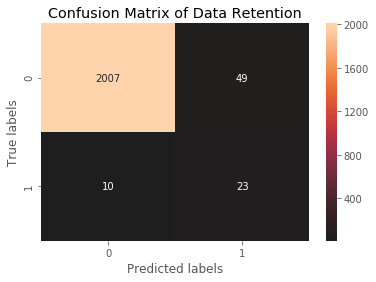

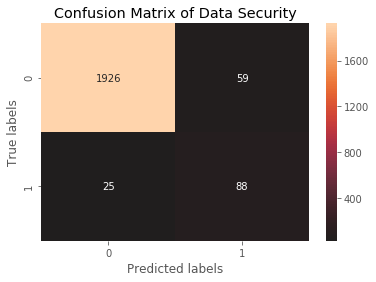

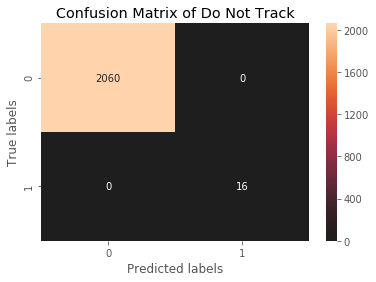

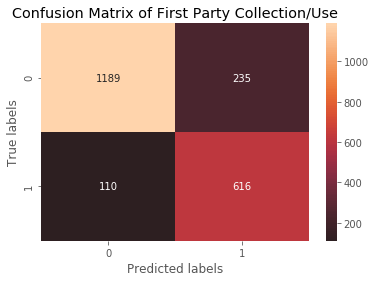

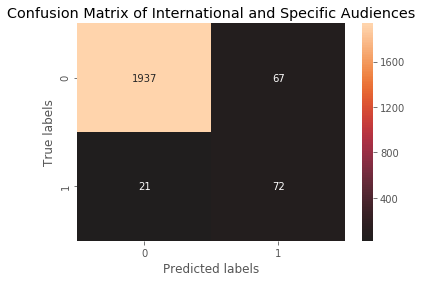

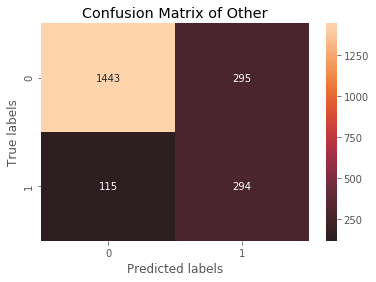

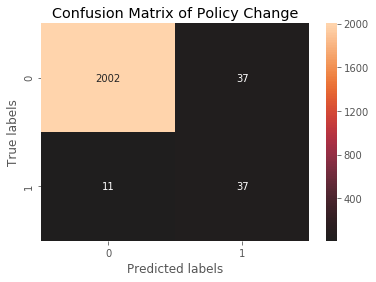

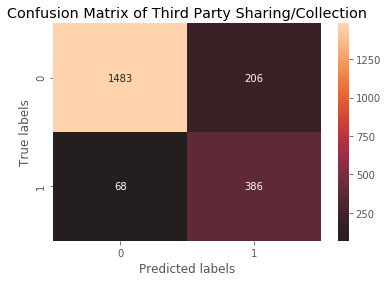

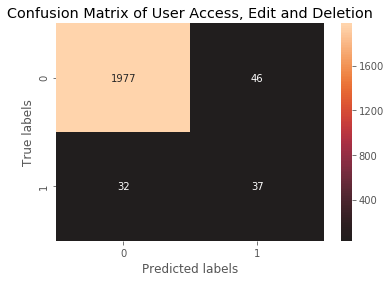

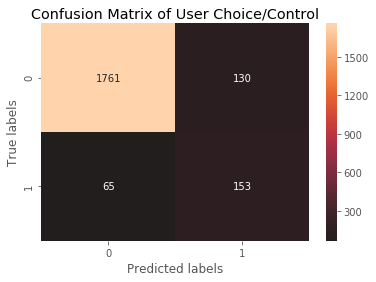

In [119]:
import seaborn as sns

def plot_confusion_matrix_seaborn(cat_confusion_matrix_dict):
    
    for key, cm in cat_confusion_matrix_dict.items():
        fig = plt.figure()
        ax = fig.add_subplot(111)
        sns.heatmap(cm, annot=True, ax = ax, center=0, fmt="d"); #annot=True to annotate cells
        # labels, title and ticks
        ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
        ax.set_title('Confusion Matrix of ' + key); 
        ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);
#         break
plot_confusion_matrix_seaborn(cat_confusion_matrix_dict)

In [159]:
import seaborn as sns

def plot_cat_scores(cat_score_dict):
    columns=["accuracy", "specificity", "sensitivity", "precision", "f1score"]
    df = pd.DataFrame(columns=columns)
    frames = []
    for k, v in cat_score_dict.items():
        val = v.values()
        temp = pd.DataFrame([val])
        frames.append(temp)
    df = pd.concat(frames)
    df.head()
plot_cat_scores(cat_score_dict)

          0         1         2         3         4
0  0.968406  0.361111  0.990084  0.977484  0.983744
0  0.953289  0.553957  0.981623  0.968766  0.975152
0  0.999518  0.875000  1.000000  0.999517  0.999758
0  0.851628  0.751825  0.913404  0.856034  0.883789
0  0.961850  0.596154  0.991242  0.968294  0.979633
0  0.805776  0.518010  0.913043  0.835576  0.872594
0  0.979396  0.582278  0.995020  0.983752  0.989354
0  0.853476  0.624796  0.945098  0.862768  0.902059
0  0.966061  0.550000  0.982604  0.982116  0.982360
0  0.898056  0.482014  0.961223  0.924370  0.942436


In [165]:
df = pd.DataFrame(data=cat_score_dict)
df.head()

Data Retention  Data Security  Do Not Track  \
accuracy           0.968406       0.953289      0.999518   
f1score            0.983744       0.975152      0.999758   
precision          0.977484       0.968766      0.999517   
sensitivity        0.990084       0.981623      1.000000   
specificity        0.361111       0.553957      0.875000   

             First Party Collection/Use  International and Specific Audiences  \
accuracy                       0.851628                              0.961850   
f1score                        0.883789                              0.979633   
precision                      0.856034                              0.968294   
sensitivity                    0.913404                              0.991242   
specificity                    0.751825                              0.596154   

                Other  Policy Change  Third Party Sharing/Collection  \
accuracy     0.805776       0.979396                        0.853476   
f1score      0.872594       0.989354                        0.902059   
precision    0.835576       0.983752                        0.862768   
sensitivity  0.913043       0.995020                        0.945098   
specificity  0.518010       0.582278                        0.624796   

             User Access, Edit and Deletion  User Choice/Control  
accuracy                           0.966061             0.898056  
f1score                            0.982360             0.942436  
precision                          0.982116             0.924370  
sensitivity                        0.982604             0.961223  
specificity                        0.550000             0.482014